In [1]:
import numpy as np
import pandas as pd

# Viz Library
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

In [2]:
# Reading the Response Dataset
response = pd.read_csv('dataset/kaggle_survey_2020_responses.csv')
response = response.drop(response.index[0], axis = 0)

In [3]:
response.head()

Time from Start to Finish (seconds)     Q1   Q2                        Q3  \
1                                1838  35-39  Man                  Colombia   
2                              289287  30-34  Man  United States of America   
3                                 860  35-39  Man                 Argentina   
4                                 507  30-34  Man  United States of America   
5                                  78  30-34  Man                     Japan   

                  Q4                 Q5           Q6 Q7_Part_1 Q7_Part_2  \
1    Doctoral degree            Student   5-10 years    Python         R   
2    Master’s degree      Data Engineer   5-10 years    Python         R   
3  Bachelor’s degree  Software Engineer  10-20 years       NaN       NaN   
4    Master’s degree     Data Scientist   5-10 years    Python       NaN   
5    Master’s degree  Software Engineer    3-5 years    Python       NaN   

  Q7_Part_3  ... Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1       SQL  ...          NaN          NaN          NaN   TensorBoard    
2       SQL  ...          NaN          NaN          NaN            NaN   
3       NaN  ...          NaN          NaN          NaN            NaN   
4       SQL  ...          NaN          NaN          NaN            NaN   
5       NaN  ...          NaN          NaN          NaN            NaN   

  Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10  \
1          NaN          NaN          NaN          NaN           NaN   
2          NaN          NaN          NaN          NaN           NaN   
3          NaN          NaN          NaN          NaN          None   
4          NaN          NaN          NaN          NaN           NaN   
5          NaN          NaN          NaN          NaN           NaN   

  Q35_B_OTHER  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  

[5 rows x 355 columns]

In [4]:
response.info

<bound method DataFrame.info of       Time from Start to Finish (seconds)     Q1     Q2  \
1                                    1838  35-39    Man   
2                                  289287  30-34    Man   
3                                     860  35-39    Man   
4                                     507  30-34    Man   
5                                      78  30-34    Man   
...                                   ...    ...    ...   
20032                                 126  18-21    Man   
20033                                 566  55-59  Woman   
20034                                 238  30-34    Man   
20035                                 625  22-24    Man   
20036                                1031  22-24    Man   

                                                      Q3  \
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                  

In [5]:
response.describe()

Time from Start to Finish (seconds)     Q1     Q2     Q3  \
count                                 20036  20036  20036  20036   
unique                                 5167     11      5     55   
top                                     565  25-29    Man  India   
freq                                     34   4011  15789   5851   

                     Q4       Q5         Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
count             19569    19277      19120     15530      4277      7535   
unique                7       13          7         1         1         1   
top     Master’s degree  Student  3-5 years    Python         R       SQL   
freq               7859     5171       4546     15530      4277      7535   

        ...        Q35_B_Part_2 Q35_B_Part_3          Q35_B_Part_4  \
count   ...                1177          494                   430   
unique  ...                   1            1                     1   
top     ...   Weights & Biases     Comet.ml    Sacred + Omniboard    
freq    ...                1177          494                   430   

         Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8  \
count            3199          557          480          846   
unique              1            1            1            1   
top      TensorBoard     Guild.ai     Polyaxon       Trains    
freq             3199          557          480          846   

                  Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER  
count                      519          3082         251  
unique                       1             1           1  
top      Domino Model Monitor           None       Other  
freq                       519          3082         251  

[4 rows x 355 columns]

In [6]:
response.shape

(20036, 355)

***Question 1: Age Distribution***

In [7]:
data = response['Q1'].sort_values(ascending=True)

Text(0, 0.5, 'Percentage')

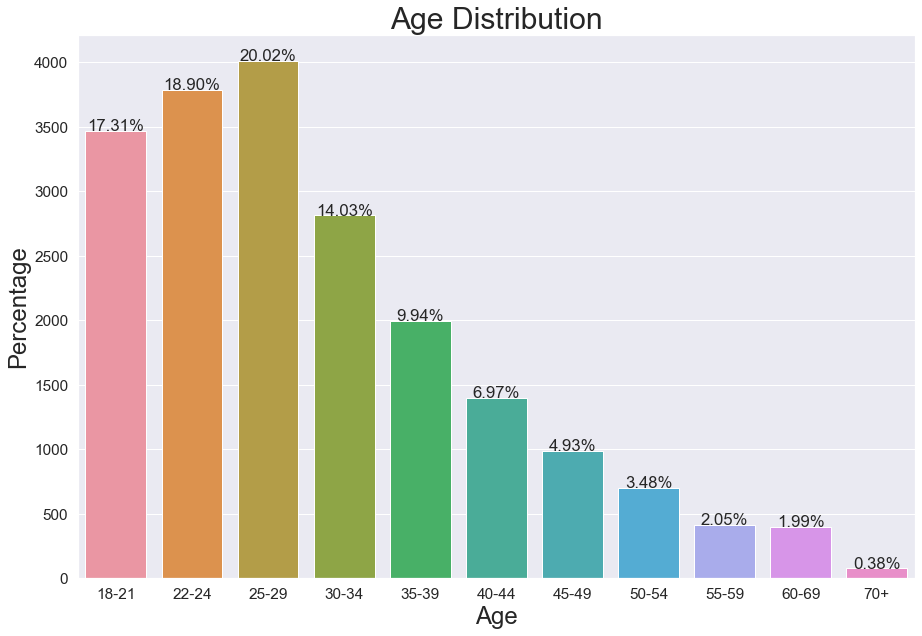

In [8]:
sns.set(font_scale=1.4)
sns.color_palette("tab10")
plt.figure(figsize=(15,10))

total = float(len(response)) # one person per row 

ax = sns.countplot(x = data, data = response)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 

plt.title('Age Distribution',
         fontsize =30)

plt.xlabel('Age', fontsize = 24)
plt.ylabel('Percentage', fontsize = 24)

***Question 2: Gender Identity of Data Scientist***

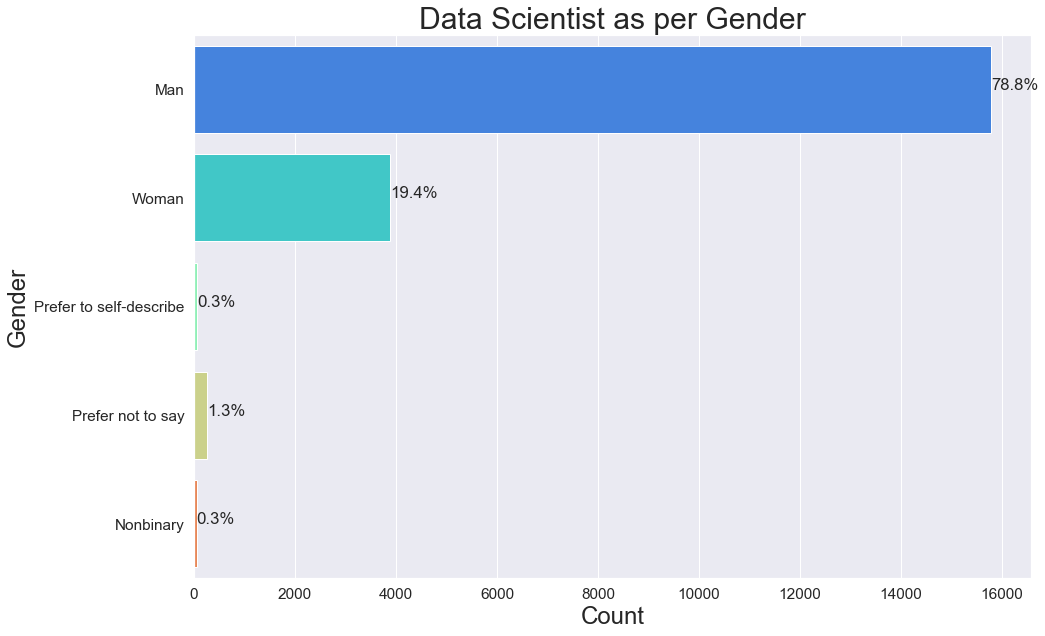

In [9]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))

ax = sns.countplot(y = "Q2", data = response, palette = "rainbow")

plt.title('Gender Distribution')
plt.xlabel('Frequencies')

total = len(response['Q2'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Data Scientist as per Gender',
         fontsize =30)

plt.xlabel('Count', fontsize = 24)
plt.ylabel('Gender', fontsize = 24)

plt.show()

***Question 3: In which country do you currently reside ?***

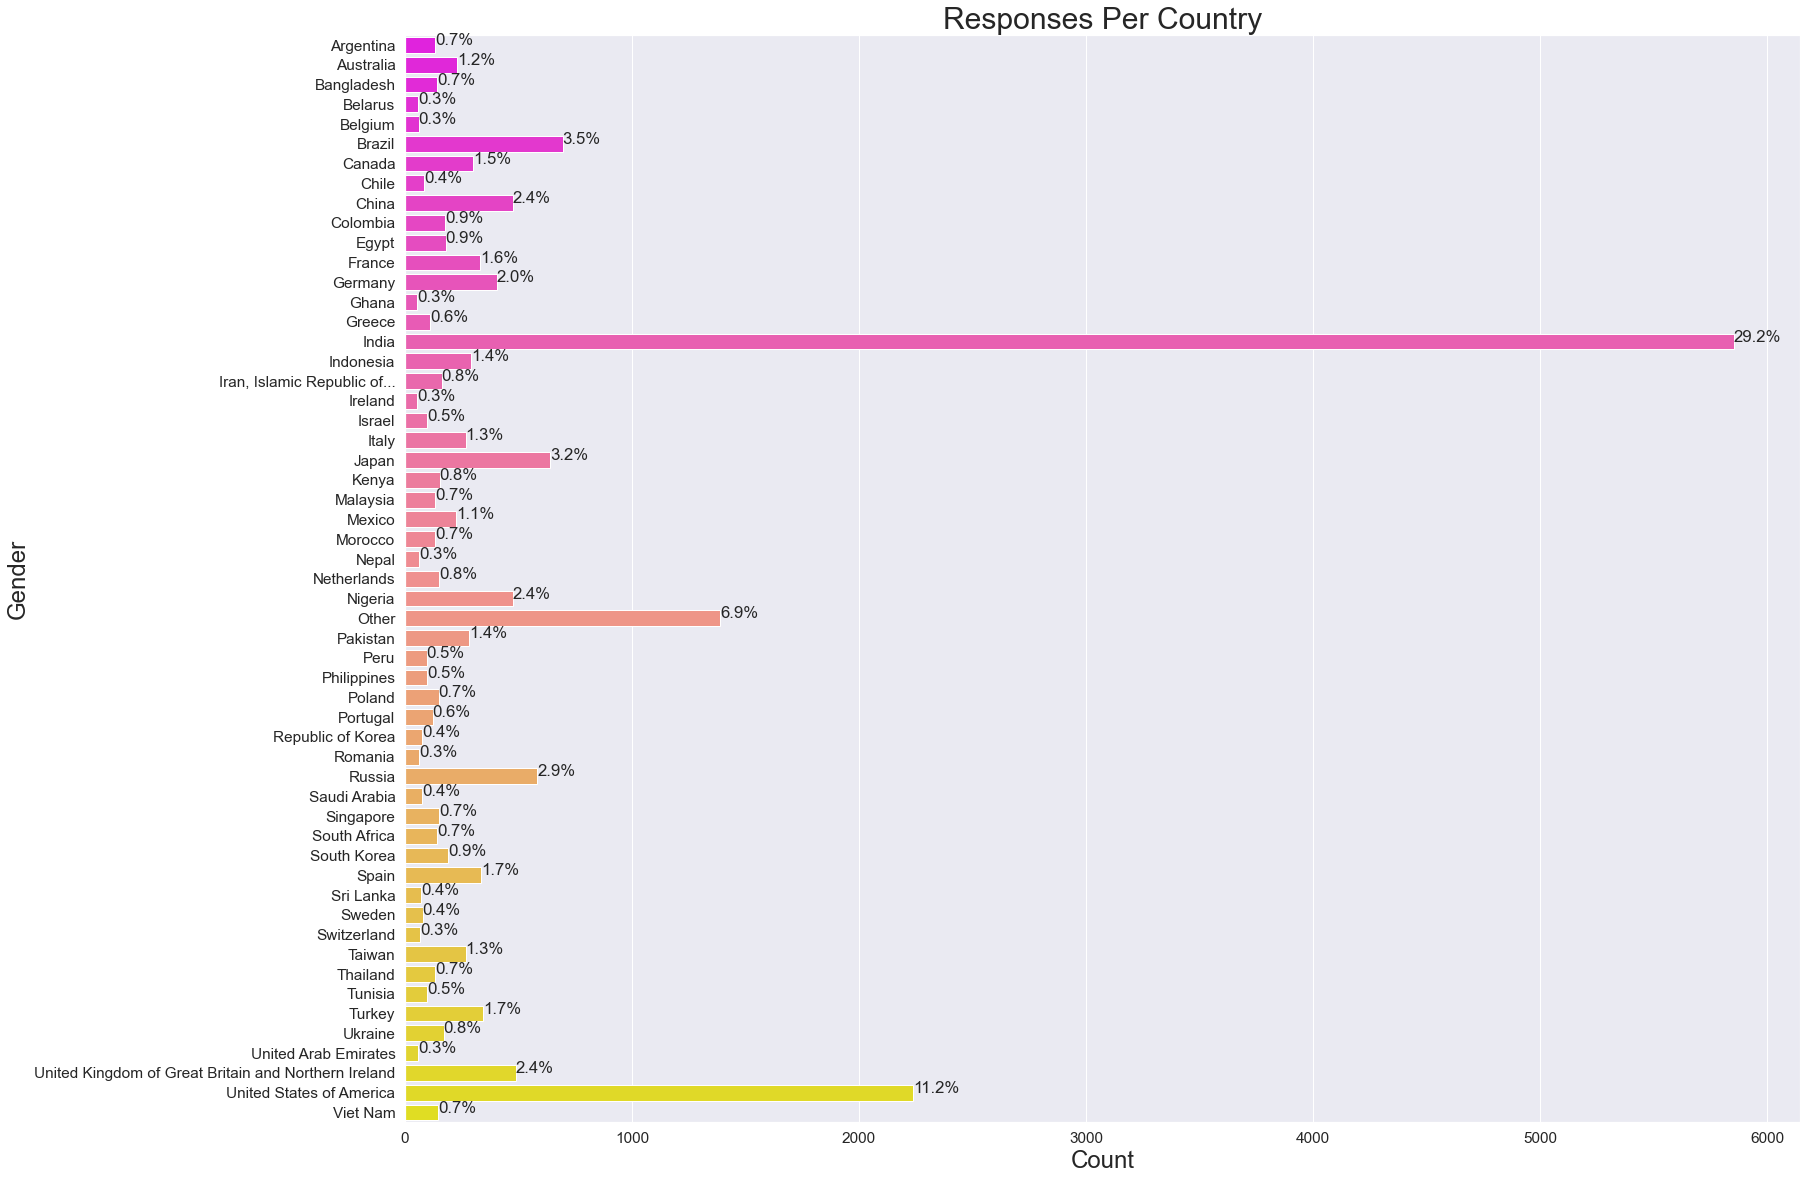

In [10]:
sns.set(font_scale=1.4)
plt.figure(figsize=(25,20))

data = response['Q3'].sort_values(ascending=True)

ax = sns.countplot(y = data, data = response, palette = "spring")

total = len(response['Q3'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Responses Per Country',
         fontsize =30)

plt.xlabel('Count', fontsize = 24)
plt.ylabel('Gender', fontsize = 24)

plt.show()

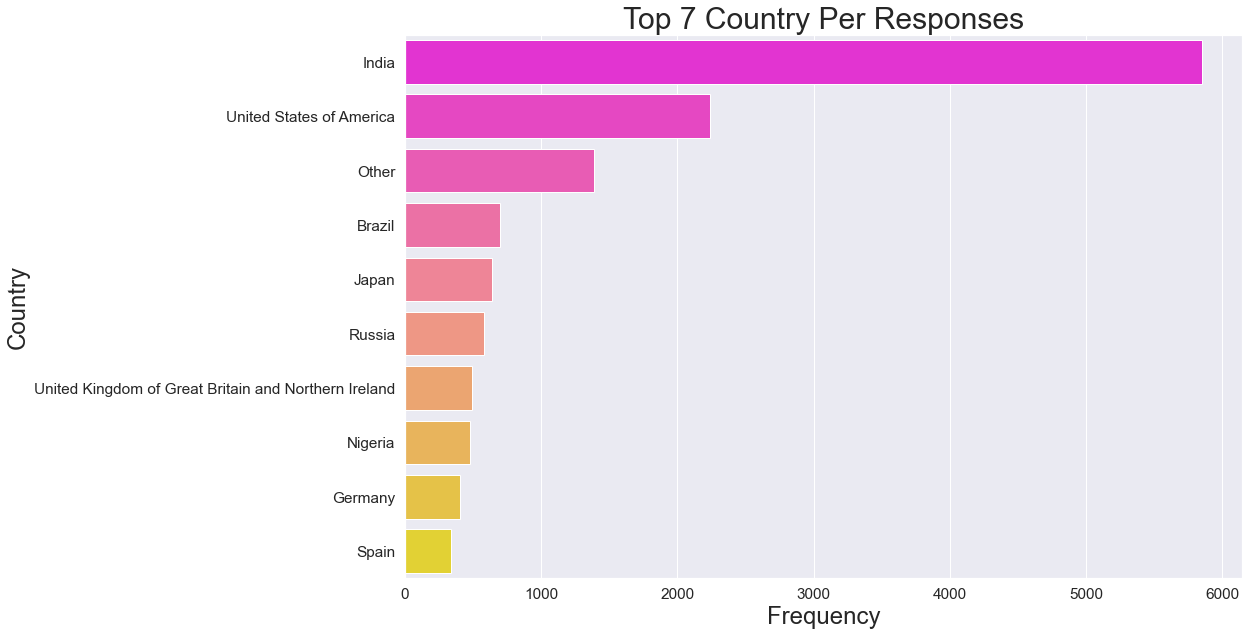

In [11]:
'''
Plotting Top 7 Countries which has More Number of Responses
'''

sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))

sns.countplot(y = response['Q3'], palette = 'spring', data = response, order=['India', 'United States of America', 'Other', 'Brazil',
                                                                                       'Japan', 'Russia', 'United Kingdom of Great Britain and Northern Ireland',
                                                                                       'Nigeria', 'Germany', 'Spain'])

plt.title('Top 7 Country Per Responses',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Country', fontsize = 24)

plt.show()

***Question 4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?***

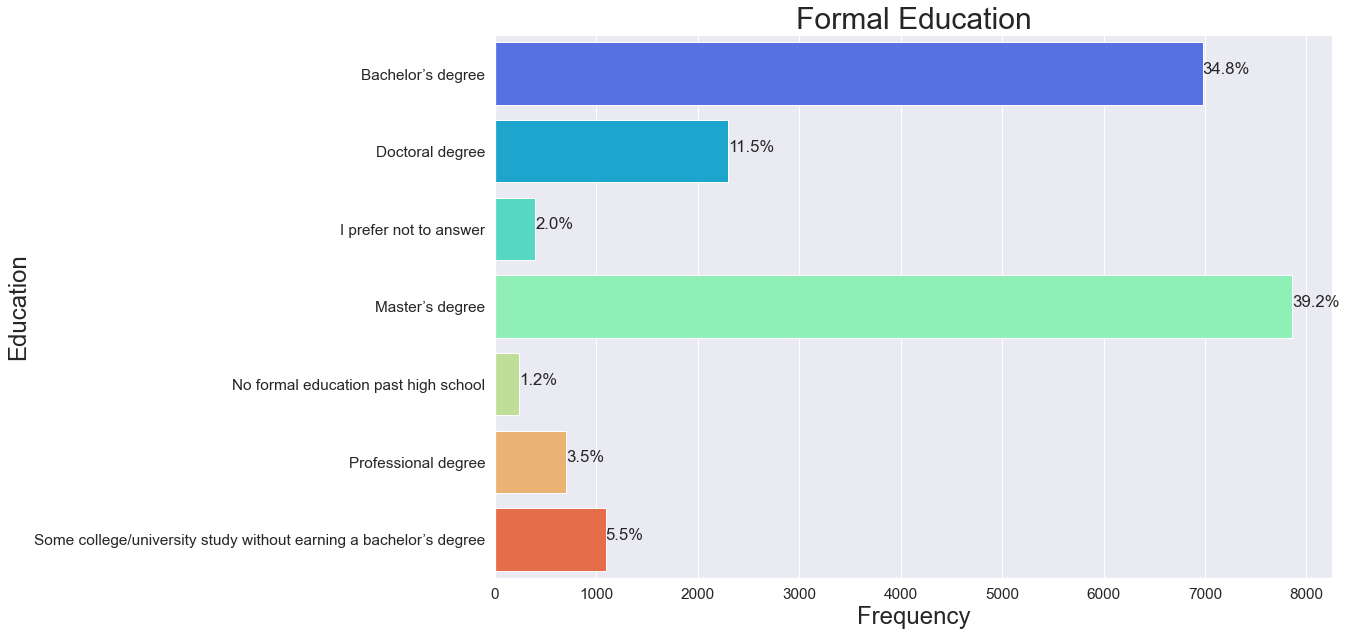

In [12]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))

data = response['Q4'].sort_values(ascending=True)

ax = sns.countplot(y = data, data = response, palette = "rainbow")

total = len(response['Q4'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Formal Education',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Education', fontsize = 24)

plt.show()

***Question 5: Select the title most similar to your current role (or most recent title if retired)***

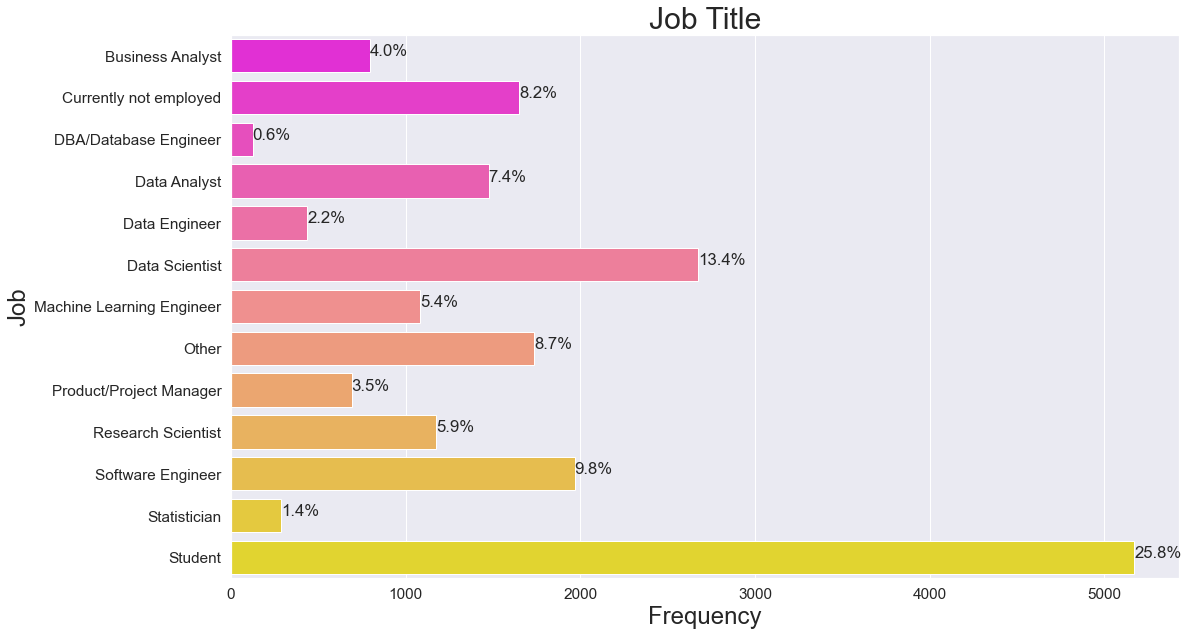

In [13]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

data = response['Q5'].sort_values(ascending=True)

ax = sns.countplot(y = data, data = response, palette = "spring")

total = len(response['Q5'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Job Title',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Job', fontsize = 24)

plt.show()

***Question 6: For how many years have you been writing code and/or programming?***

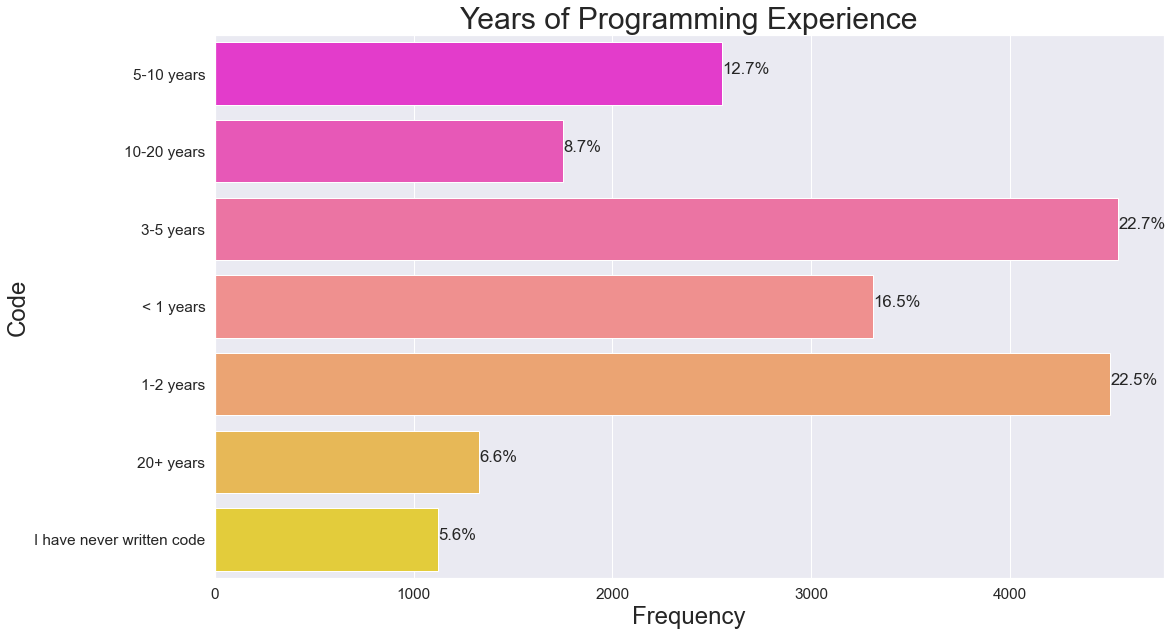

In [14]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q6', data = response, palette = "spring")

total = len(response['Q6'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Years of Programming Experience',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Code', fontsize = 24)

plt.show()

***Question 7: What programming languages do you use on a regular basis?***

In [15]:
# Combining All the Question 7 answers

question_7 = np.concatenate([response.Q7_Part_1,
                             response.Q7_Part_2,
                             response.Q7_Part_3,
                             response.Q7_Part_4,
                             response.Q7_Part_5,
                             response.Q7_Part_6,
                             response.Q7_Part_7,
                             response.Q7_Part_8,
                             response.Q7_Part_9,
                             response.Q7_Part_10,
                             response.Q7_Part_11,
                             response.Q7_Part_12,
                             response.Q7_OTHER,
])

ques_7 = pd.concat([response, pd.DataFrame(question_7)], ignore_index = True, axis = 1)

ques_7.columns = np.append(response.columns.values, 'Q7')

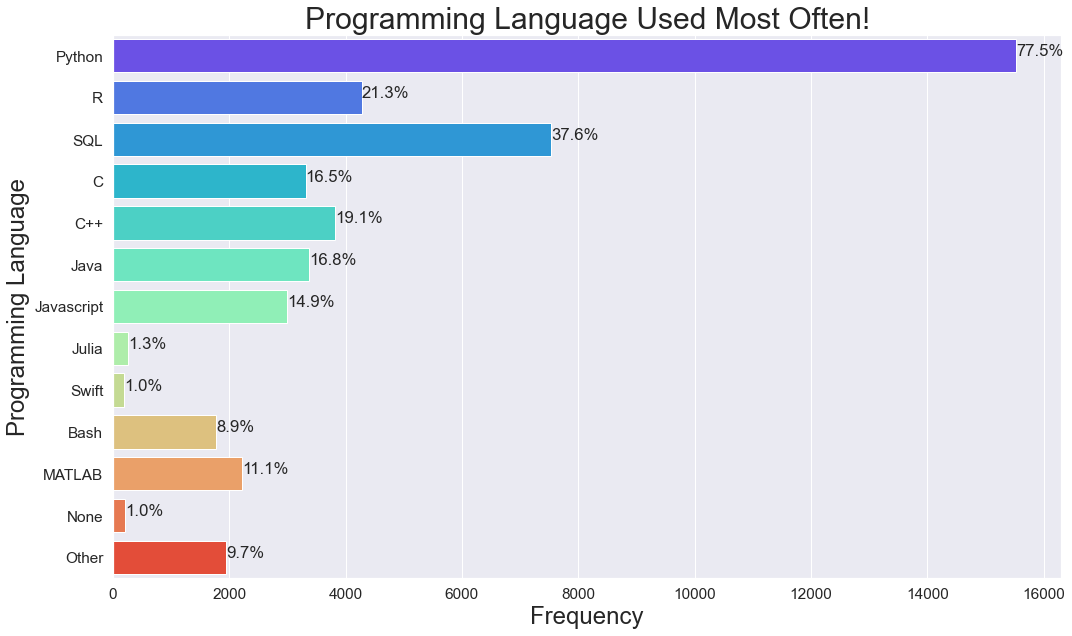

In [16]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_7.Q7, data = response, palette = "rainbow")

total = len(response['Q7_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Programming Language Used Most Often!',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Programming Language', fontsize = 24)

plt.show()

***Question 8: What programming language would you recommend an aspiring data scientist to learn first?***

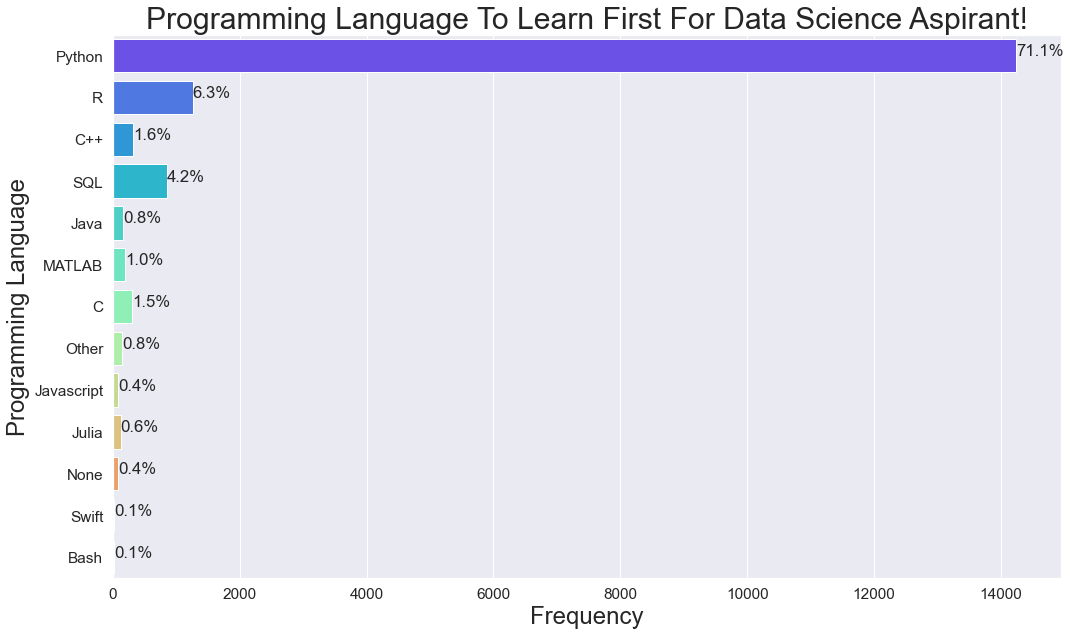

In [17]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q8', data = response, palette = "rainbow")

total = len(response['Q8'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Programming Language To Learn First For Data Science Aspirant!',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Programming Language', fontsize = 24)

plt.show()

***Question 9: Which of the following integrated development environments (IDE's) do you use on a regular basis?***

In [18]:
# Combining All the Question 9 answers

question_9 = np.concatenate([response.Q9_Part_1,
                             response.Q9_Part_2,
                             response.Q9_Part_3,
                             response.Q9_Part_4,
                             response.Q9_Part_5,
                             response.Q9_Part_6,
                             response.Q9_Part_7,
                             response.Q9_Part_8,
                             response.Q9_Part_9,
                             response.Q9_Part_10,
                             response.Q9_Part_11,
                             response.Q9_OTHER
])

ques_9 = pd.concat([response, pd.DataFrame(question_9)], ignore_index = True, axis = 1)

ques_9.columns = np.append(response.columns.values, 'Q9')

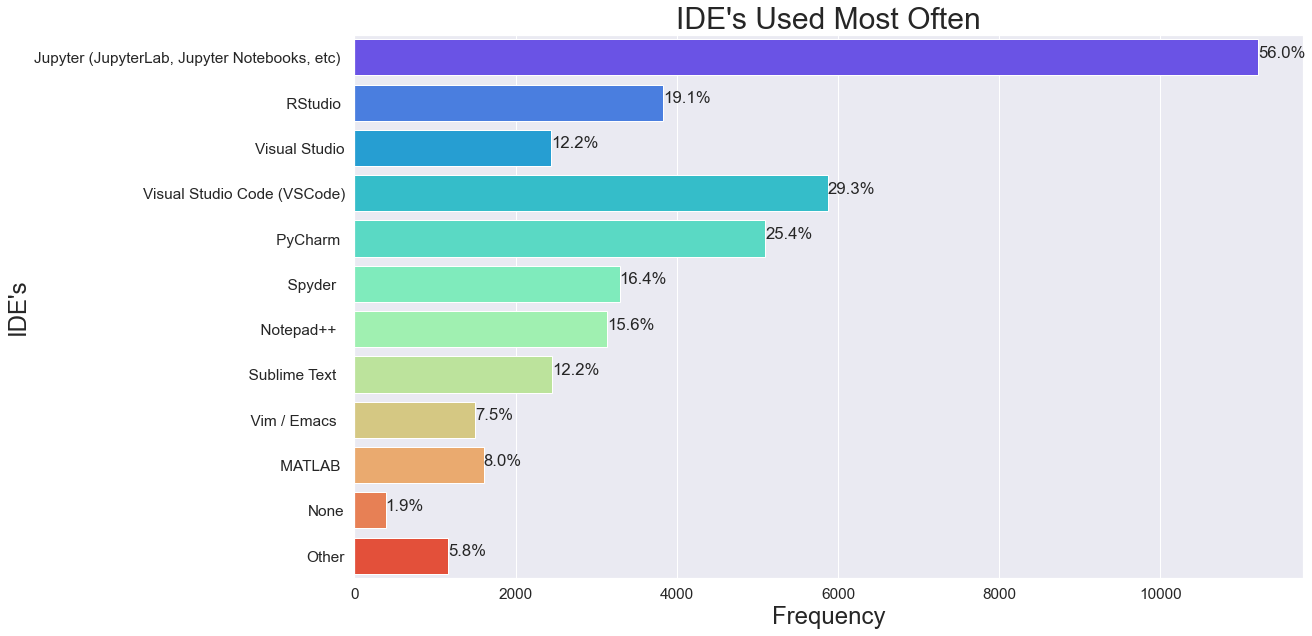

In [19]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_9.Q9, data = response, palette = "rainbow")

total = len(response['Q9_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('IDE\'s Used Most Often',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('IDE\'s', fontsize = 24)

plt.show()

***Question 10: Which of the following hosted notebook products do you use on a regular basis?***

In [20]:
# Combining All the Question 10 answers

question_10 = np.concatenate([response.Q10_Part_1,
                              response.Q10_Part_2,
                              response.Q10_Part_3,
                              response.Q10_Part_4,
                              response.Q10_Part_5,
                              response.Q10_Part_6,
                              response.Q10_Part_7,
                              response.Q10_Part_8,
                              response.Q10_Part_9,
                              response.Q10_Part_10,
                              response.Q10_Part_11,
                              response.Q10_Part_12,
                              response.Q10_Part_13,
                              response.Q10_OTHER
])

ques_10 = pd.concat([response, pd.DataFrame(question_10)], ignore_index = True, axis = 1)

ques_10.columns = np.append(response.columns.values, 'Q10')

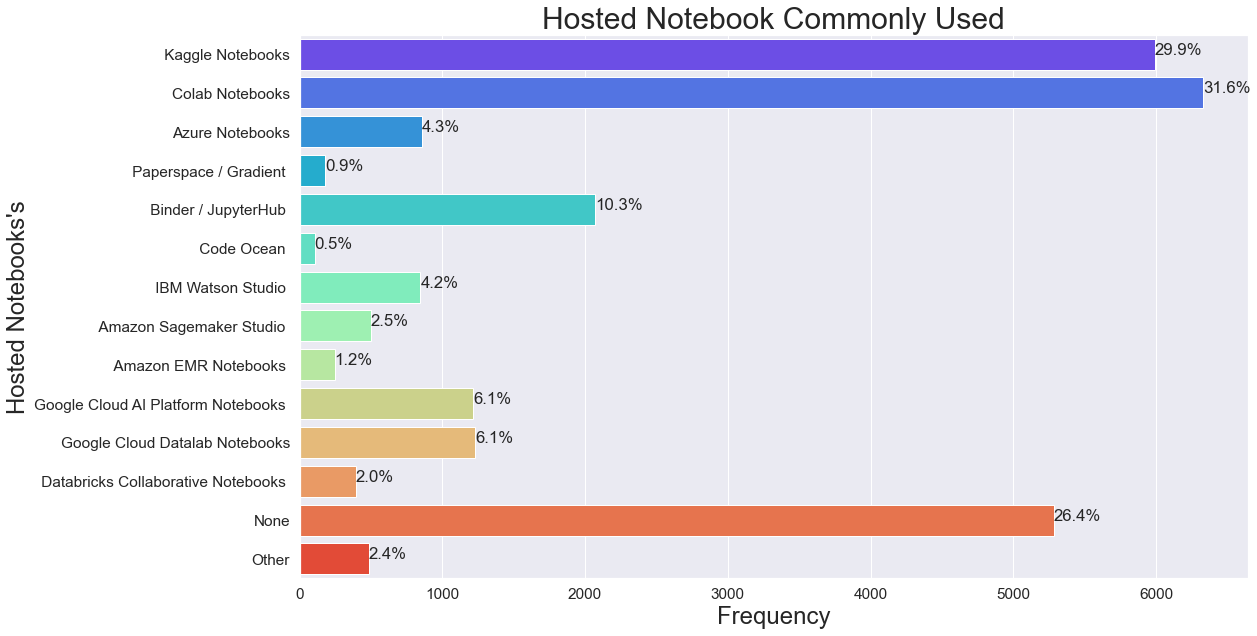

In [21]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_10.Q10, data = response, palette = "rainbow")

total = len(response['Q10_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Hosted Notebook Commonly Used',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Hosted Notebooks\'s', fontsize = 24)

plt.show()

***Question 11: What type of computing platform do you use most often for your data science projects?***

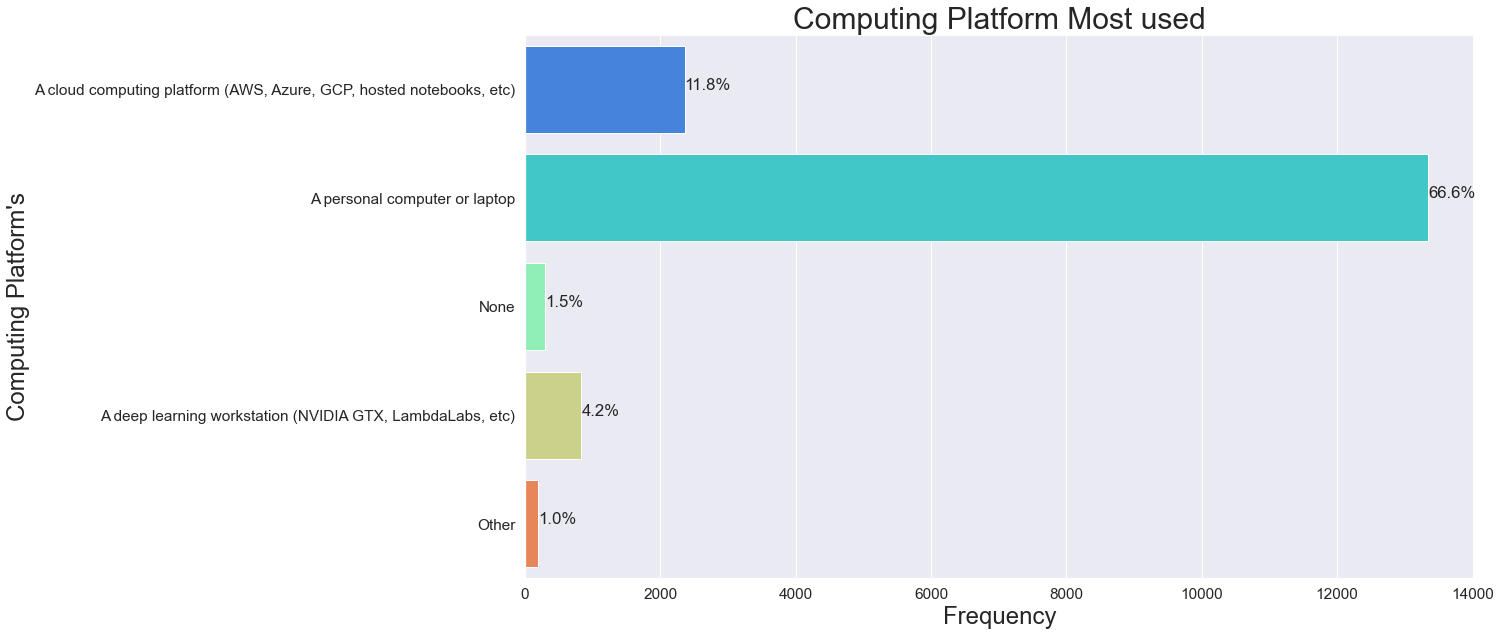

In [22]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q11', data = response, palette = "rainbow")

total = len(response['Q11'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Computing Platform Most used',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Computing Platform\'s', fontsize = 24)

plt.show()

***Question 12: Which types of specialized hardware do you use on a regular basis?***

In [23]:
# Combining All the Question 12 answers

question_12 = np.concatenate([response.Q12_Part_1,
                              response.Q12_Part_2,
                              response.Q12_Part_3,
                              response.Q12_OTHER
])

ques_12 = pd.concat([response, pd.DataFrame(question_12)], ignore_index = True, axis = 1)

ques_12.columns = np.append(response.columns.values, 'Q12')

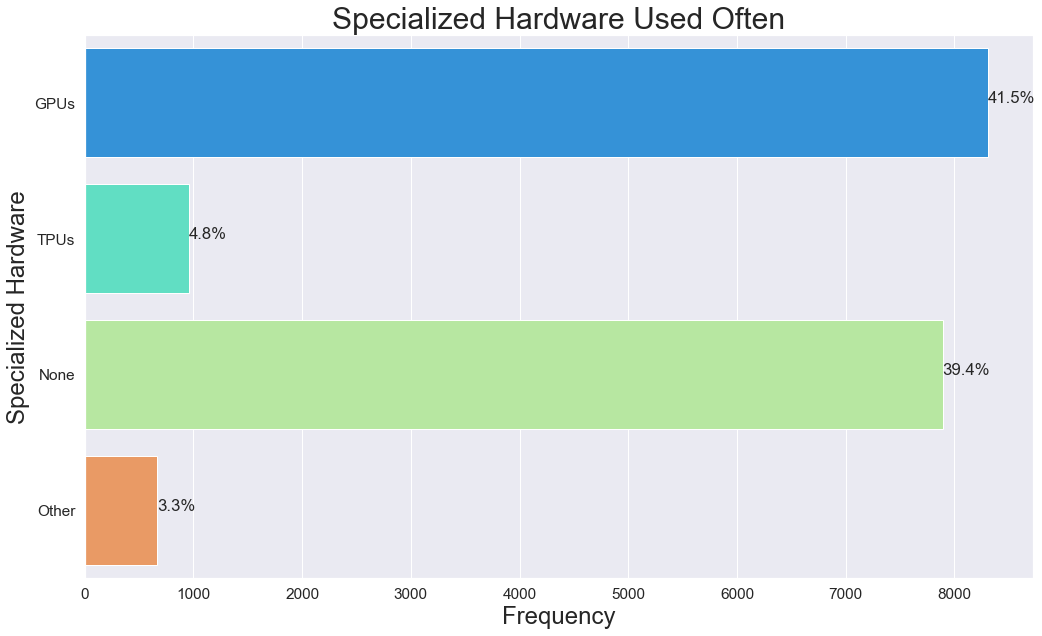

In [24]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_12.Q12, data = response, palette = "rainbow")

total = len(response['Q12_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Specialized Hardware Used Often',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Specialized Hardware', fontsize = 24)

plt.show()

***Question 13: Approximately how many times have you used a TPU?***

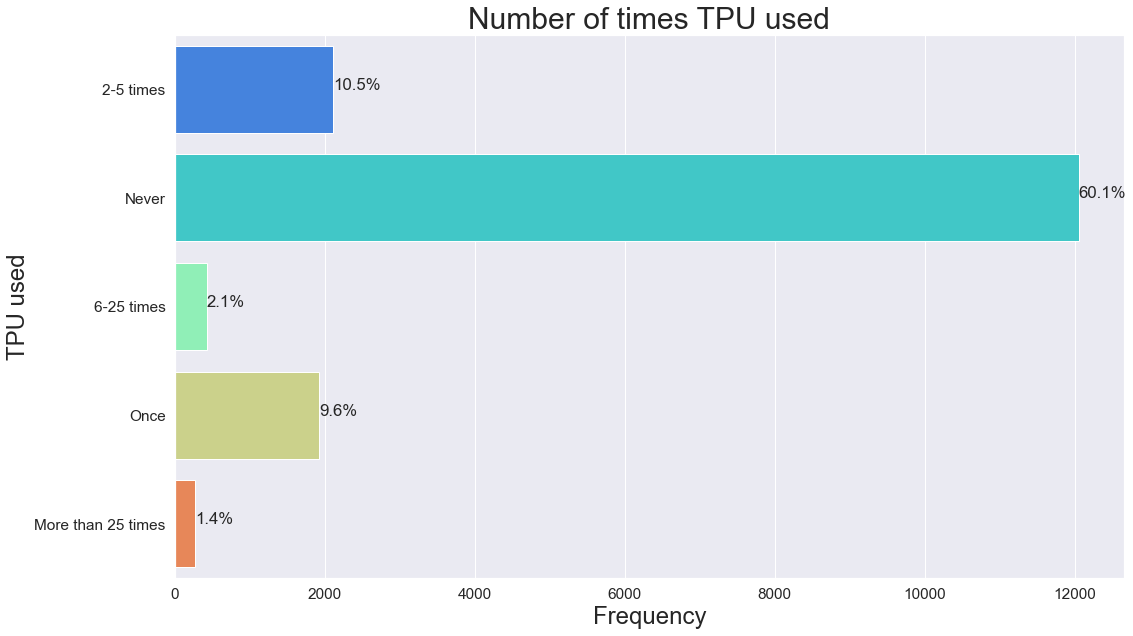

In [25]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q13', data = response, palette = "rainbow")

total = len(response['Q13'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Number of times TPU used',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('TPU used', fontsize = 24)

plt.show()

***Question 14: What data visualization libraries or tools do you use on a regular basis?***

In [26]:
question_14 = np.concatenate([response.Q14_Part_1,
                              response.Q14_Part_2,
                              response.Q14_Part_3,
                              response.Q14_Part_4,
                              response.Q14_Part_5,
                              response.Q14_Part_6,
                              response.Q14_Part_7,
                              response.Q14_Part_8,
                              response.Q14_Part_9,
                              response.Q14_Part_10,
                              response.Q14_Part_11,
                              response.Q14_OTHER
])

ques_14 = pd.concat([response, pd.DataFrame(question_14)], ignore_index = True, axis = 1)

ques_14.columns = np.append(response.columns.values, 'Q14')

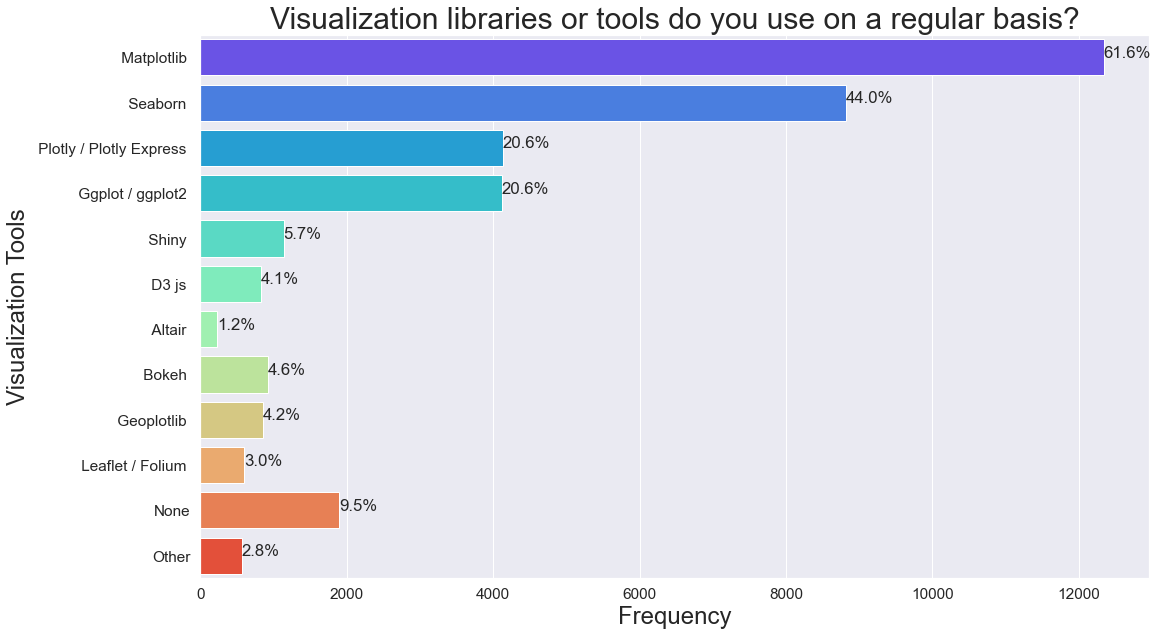

In [27]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_14.Q14, data = response, palette = "rainbow")

total = len(response['Q14_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Visualization libraries or tools do you use on a regular basis?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Visualization Tools', fontsize = 24)

plt.show()

***Question 15: For how many years have you used machine learning methods?***

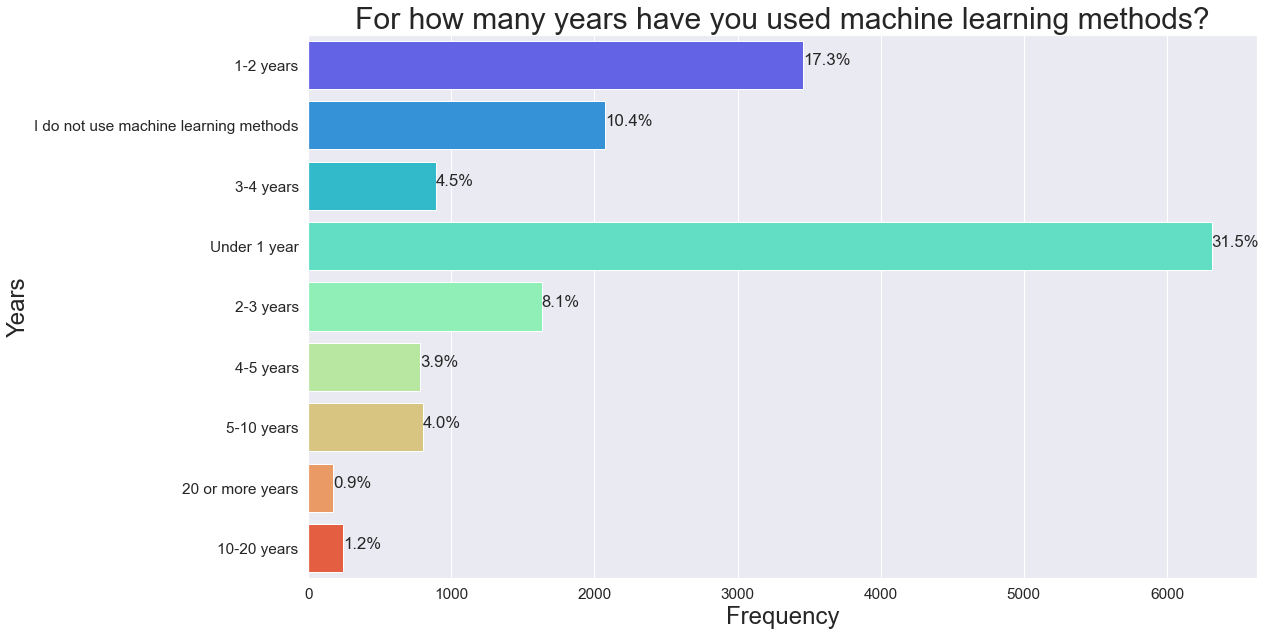

In [28]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q15', data = response, palette = "rainbow")

total = len(response['Q15'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('For how many years have you used machine learning methods?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Years', fontsize = 24)

plt.show()

***Question 16: Which of the following machine learning frameworks do you use on a regular basis?***

In [29]:
question_16 = np.concatenate([response.Q16_Part_1,
                              response.Q16_Part_2,
                              response.Q16_Part_3,
                              response.Q16_Part_4,
                              response.Q16_Part_5,
                              response.Q16_Part_6,
                              response.Q16_Part_7,
                              response.Q16_Part_8,
                              response.Q16_Part_9,
                              response.Q16_Part_10,
                              response.Q16_Part_11,
                              response.Q16_Part_12,
                              response.Q16_Part_13,
                              response.Q16_Part_14,
                              response.Q16_Part_15,
                              response.Q16_OTHER
])

ques_16 = pd.concat([response, pd.DataFrame(question_16)], ignore_index = True, axis = 1)

ques_16.columns = np.append(response.columns.values, 'Q16')

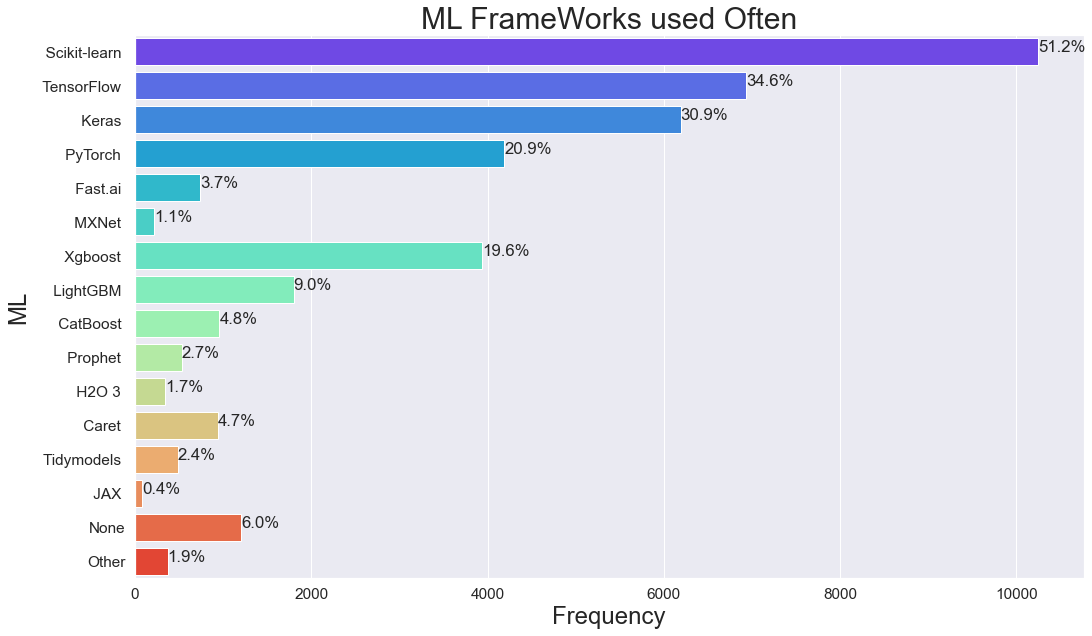

In [30]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_16.Q16, data = response, palette = "rainbow")

total = len(response['Q16_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('ML FrameWorks used Often',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('ML', fontsize = 24)

plt.show()

***Question 17: Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Gradient Boosting Machines (xgboost, lightgbm, etc)***

In [31]:
question_17 = np.concatenate([response.Q17_Part_1,
                              response.Q17_Part_2,
                              response.Q17_Part_3,
                              response.Q17_Part_4,
                              response.Q17_Part_5,
                              response.Q17_Part_6,
                              response.Q17_Part_7,
                              response.Q17_Part_8,
                              response.Q17_Part_9,
                              response.Q17_Part_10,
                              response.Q17_Part_11,
                              response.Q17_OTHER
])

ques_17 = pd.concat([response, pd.DataFrame(question_17)], ignore_index = True, axis = 1)

ques_17.columns = np.append(response.columns.values, 'Q17')

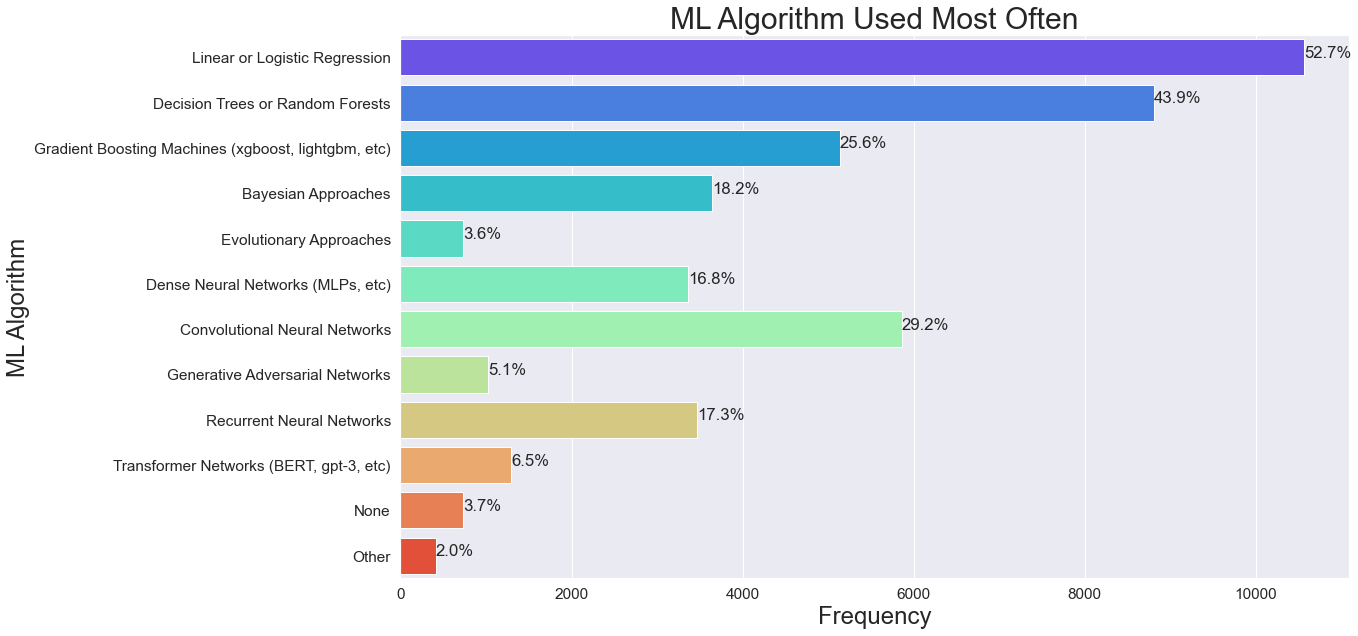

In [32]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_17.Q17, data = response, palette = "rainbow")

total = len(response['Q17_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('ML Algorithm Used Most Often',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('ML Algorithm', fontsize = 24)

plt.show()

***Question 18: Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other***

In [33]:
question_18 = np.concatenate([response.Q18_Part_1,
                              response.Q18_Part_2,
                              response.Q18_Part_3,
                              response.Q18_Part_4,
                              response.Q18_Part_5,
                              response.Q18_Part_6,
                              response.Q18_OTHER
])

ques_18 = pd.concat([response, pd.DataFrame(question_18)], ignore_index = True, axis = 1)

ques_18.columns = np.append(response.columns.values, 'Q18')

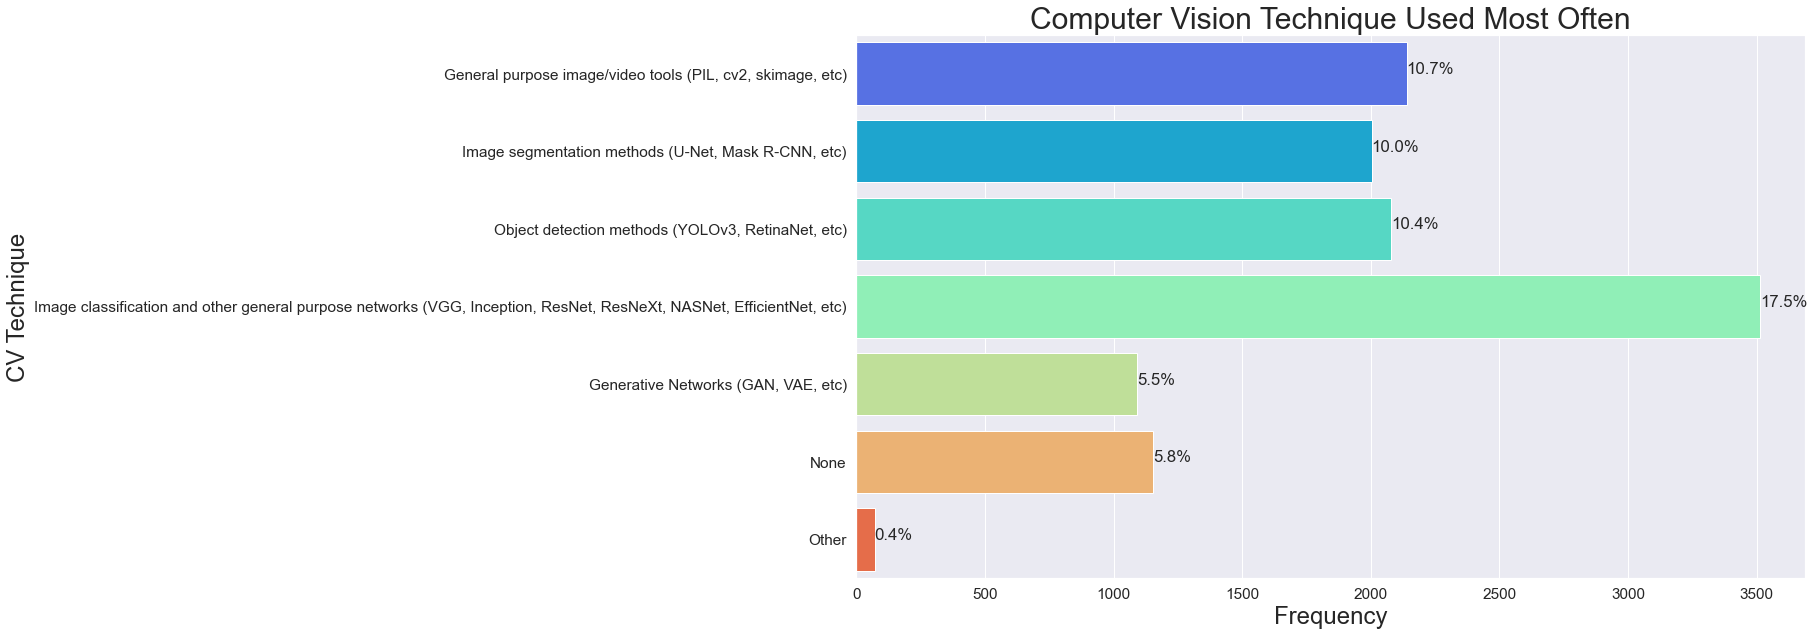

In [34]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_18.Q18, data = response, palette = "rainbow")

total = len(response['Q18_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Computer Vision Technique Used Most Often',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('CV Technique', fontsize = 24)

plt.show()

***Question 19: Which of the following natural language processing (NLP) methods do you use on a regular basis?***

In [35]:
question_19 = np.concatenate([response.Q19_Part_1,
                              response.Q19_Part_2,
                              response.Q19_Part_3,
                              response.Q19_Part_4,
                              response.Q19_Part_5,
                              response.Q19_OTHER
])

ques_19 = pd.concat([response, pd.DataFrame(question_19)], ignore_index = True, axis = 1)

ques_19.columns = np.append(response.columns.values, 'Q19')

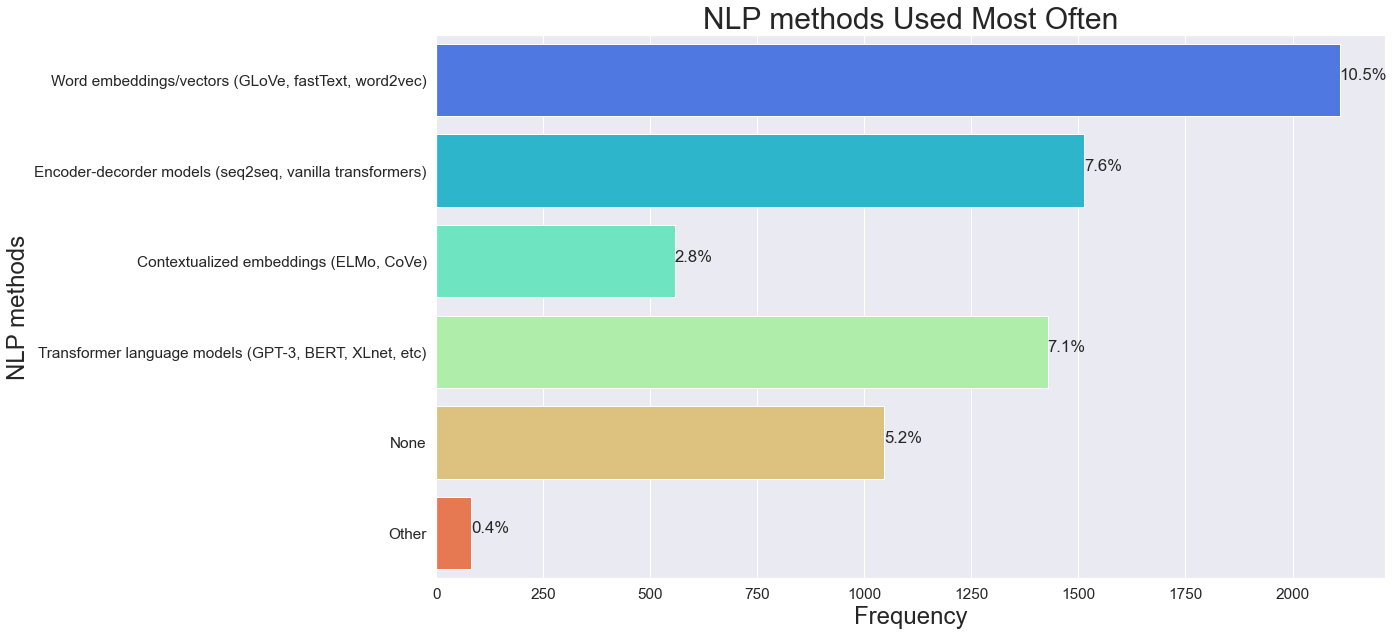

In [36]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_19.Q19, data = response, palette = "rainbow")

total = len(response['Q19_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('NLP methods Used Most Often',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('NLP methods', fontsize = 24)

plt.show()

***Question 20: What is the size of the company where you are employed?***

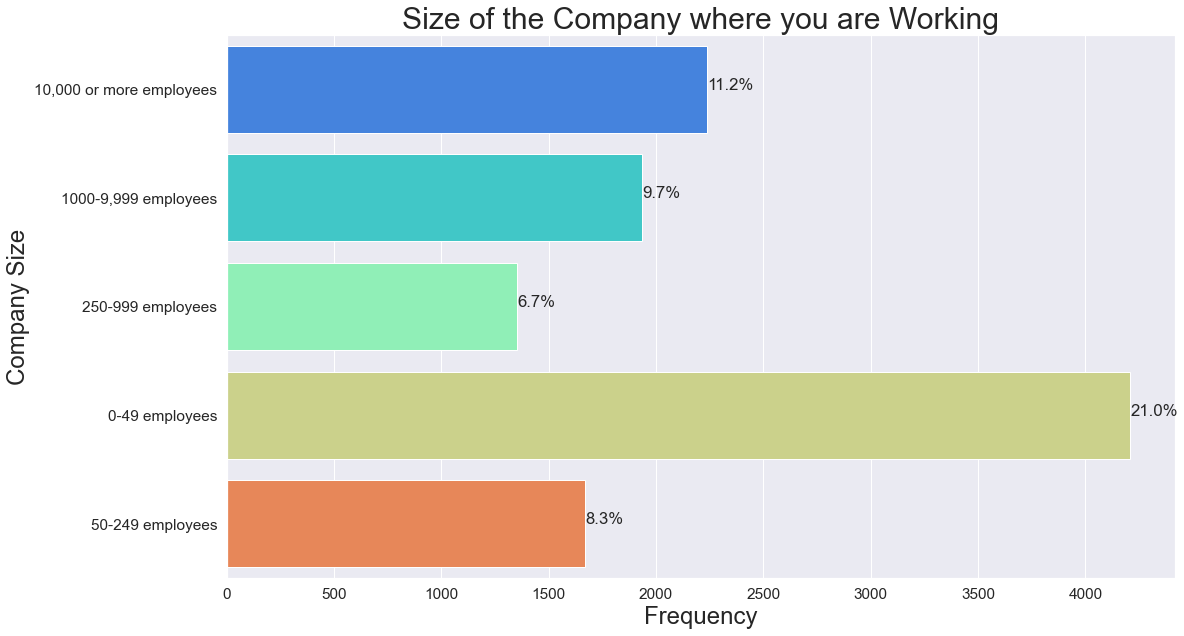

In [37]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q20', data = response, palette = "rainbow")

total = len(response['Q20'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Size of the Company where you are Working',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Company Size', fontsize = 24)

plt.show()

***Question 21: Approximately how many individuals are responsible for data science workloads at your place of business?***

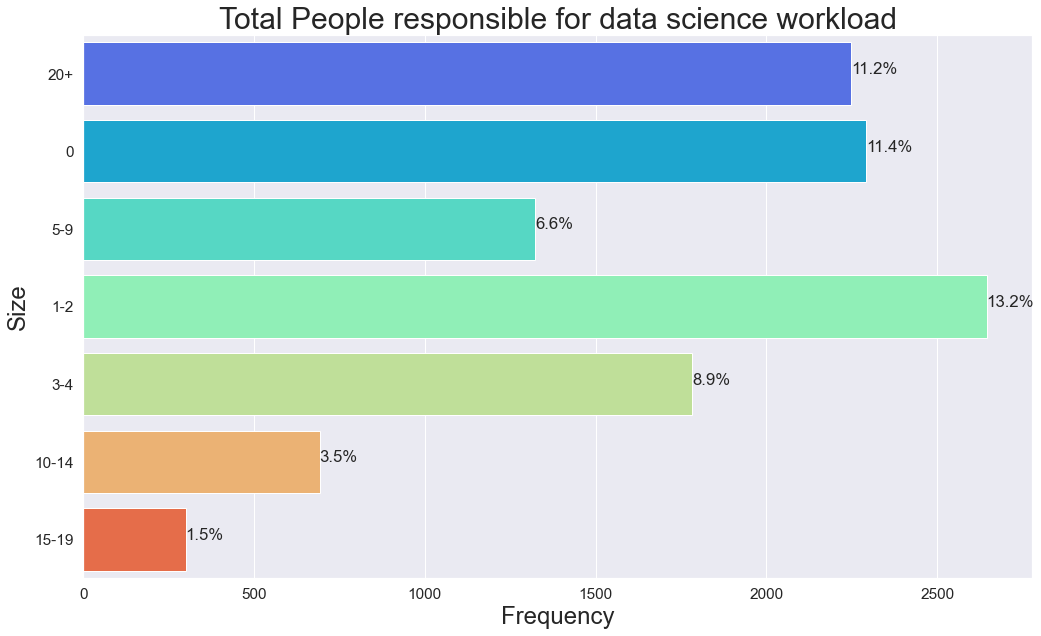

In [38]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q21', data = response, palette = "rainbow")

total = len(response['Q21'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Total People responsible for data science workload',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Size', fontsize = 24)

plt.show()

***Question 22: Does your current employer incorporate machine learning methods into their business?***

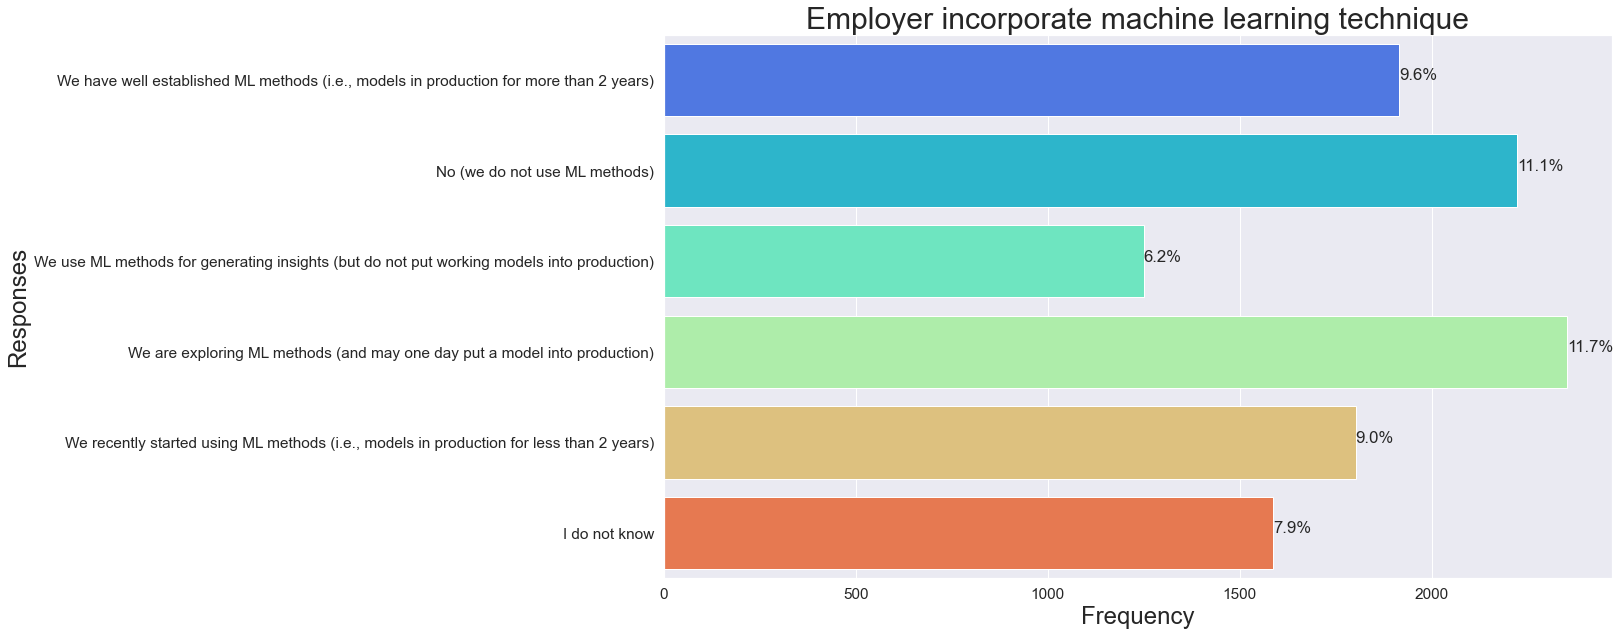

In [39]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q22', data = response, palette = "rainbow")

total = len(response['Q22'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Employer incorporate machine learning technique',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Responses', fontsize = 24)

plt.show()

***Question 23: Select any activities that make up an important part of your role at work?***

In [40]:
question_23 = np.concatenate([response.Q23_Part_1,
                              response.Q23_Part_2,
                              response.Q23_Part_3,
                              response.Q23_Part_4,
                              response.Q23_Part_5,
                              response.Q23_Part_6,
                              response.Q23_Part_7,
                              response.Q23_OTHER
])

ques_23 = pd.concat([response, pd.DataFrame(question_23)], ignore_index = True, axis = 1)

ques_23.columns = np.append(response.columns.values, 'Q23')

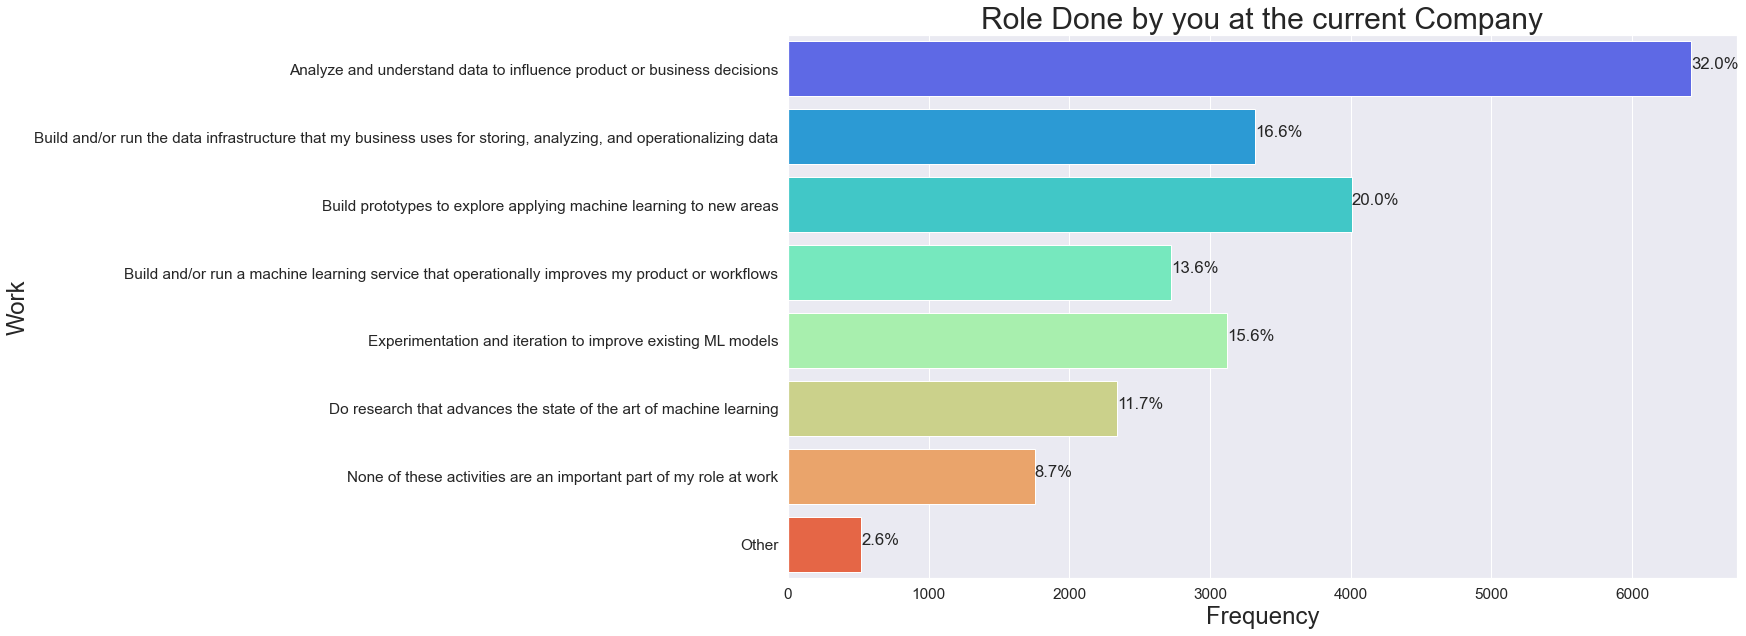

In [41]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_23.Q23, data = response, palette = "rainbow")

total = len(response['Q23_Part_1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Role Done by you at the current Company',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Work', fontsize = 24)

plt.show()

***Question 24: What is your current yearly compensation (approximate $USD)?***

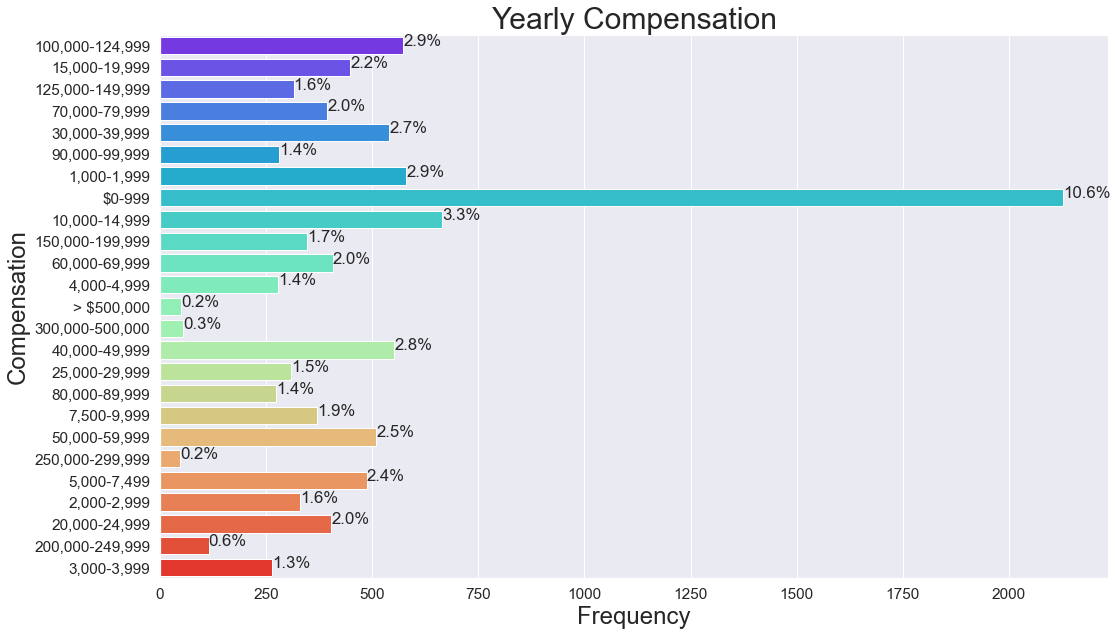

In [42]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q24', data = response, palette = "rainbow")

total = len(response['Q24'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Yearly Compensation',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Compensation', fontsize = 24)

plt.show()

***Question 25: Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?***

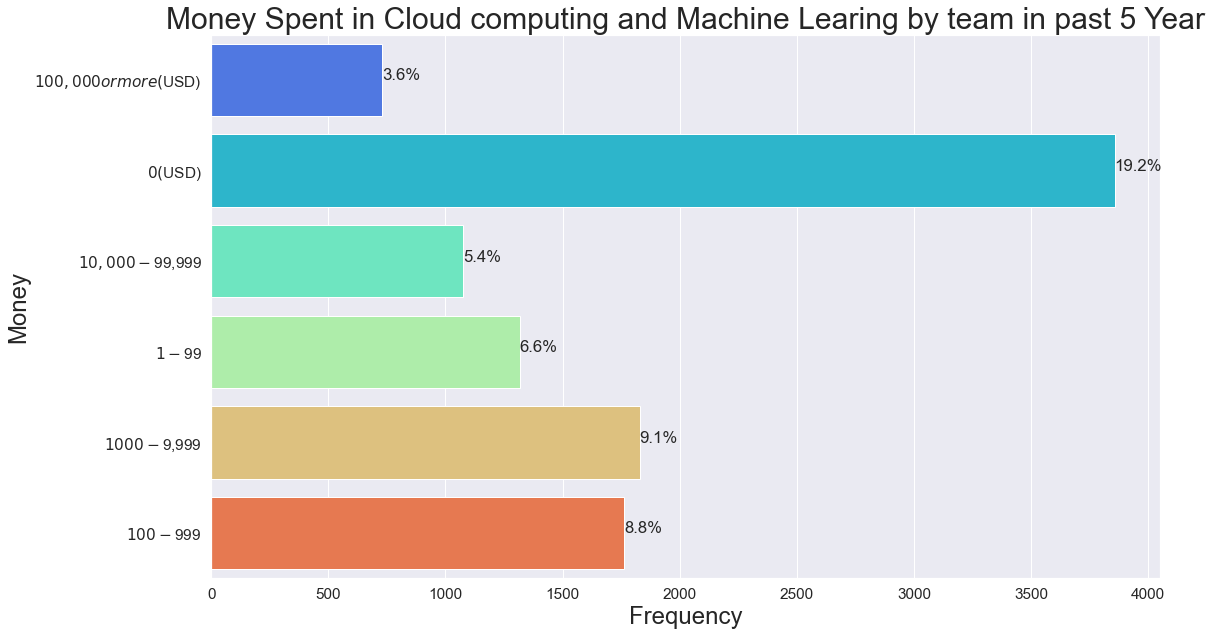

In [43]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q25', data = response, palette = "rainbow")

total = len(response['Q25'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Money Spent in Cloud computing and Machine Learing by team in past 5 Year',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Money', fontsize = 24)

plt.show()

***Question 26: Which of the following cloud computing platforms do you use on a regular basis? Part-A***

In [44]:
question_26 = np.concatenate([response.Q26_A_Part_1,
                              response.Q26_A_Part_2,
                              response.Q26_A_Part_3,
                              response.Q26_A_Part_4,
                              response.Q26_A_Part_5,
                              response.Q26_A_Part_6,
                              response.Q26_A_Part_7,
                              response.Q26_A_Part_8,
                              response.Q26_A_Part_9,
                              response.Q26_A_Part_10,
                              response.Q26_A_Part_11,
                              response.Q26_A_OTHER
])

ques_26 = pd.concat([response, pd.DataFrame(question_26)], ignore_index = True, axis = 1)

ques_26.columns = np.append(response.columns.values, 'Q26')

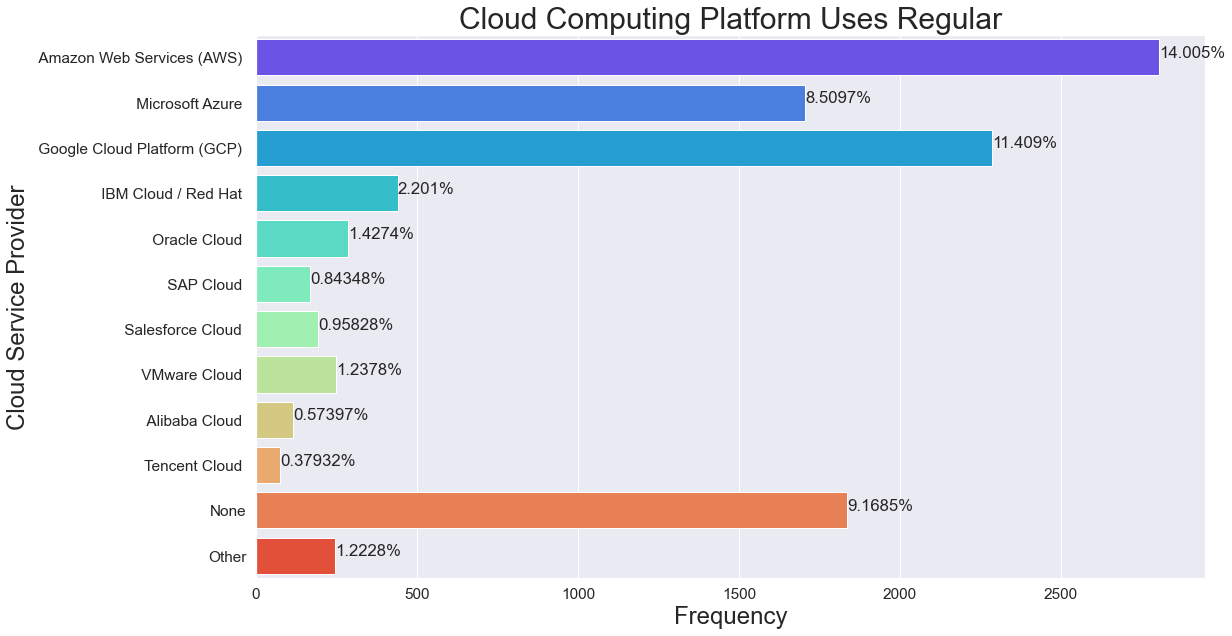

In [45]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_26.Q26, data = response, palette = "rainbow")

total = len(response['Q26_A_Part_1'])
for p in ax.patches:
        percentage = '{:.5}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Cloud Computing Platform Uses Regular',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Cloud Service Provider', fontsize = 24)

plt.show()

***Question 26 Part-B: Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?***

In [46]:
question_26_b = np.concatenate([response.Q26_B_Part_1,
                              response.Q26_B_Part_2,
                              response.Q26_B_Part_3,
                              response.Q26_B_Part_4,
                              response.Q26_B_Part_5,
                              response.Q26_B_Part_6,
                              response.Q26_B_Part_7,
                              response.Q26_B_Part_8,
                              response.Q26_B_Part_9,
                              response.Q26_B_Part_10,
                              response.Q26_B_Part_11,
                              response.Q26_B_OTHER
])

ques_26_b = pd.concat([response, pd.DataFrame(question_26_b)], ignore_index = True, axis = 1)

ques_26_b.columns = np.append(response.columns.values, 'Q26')

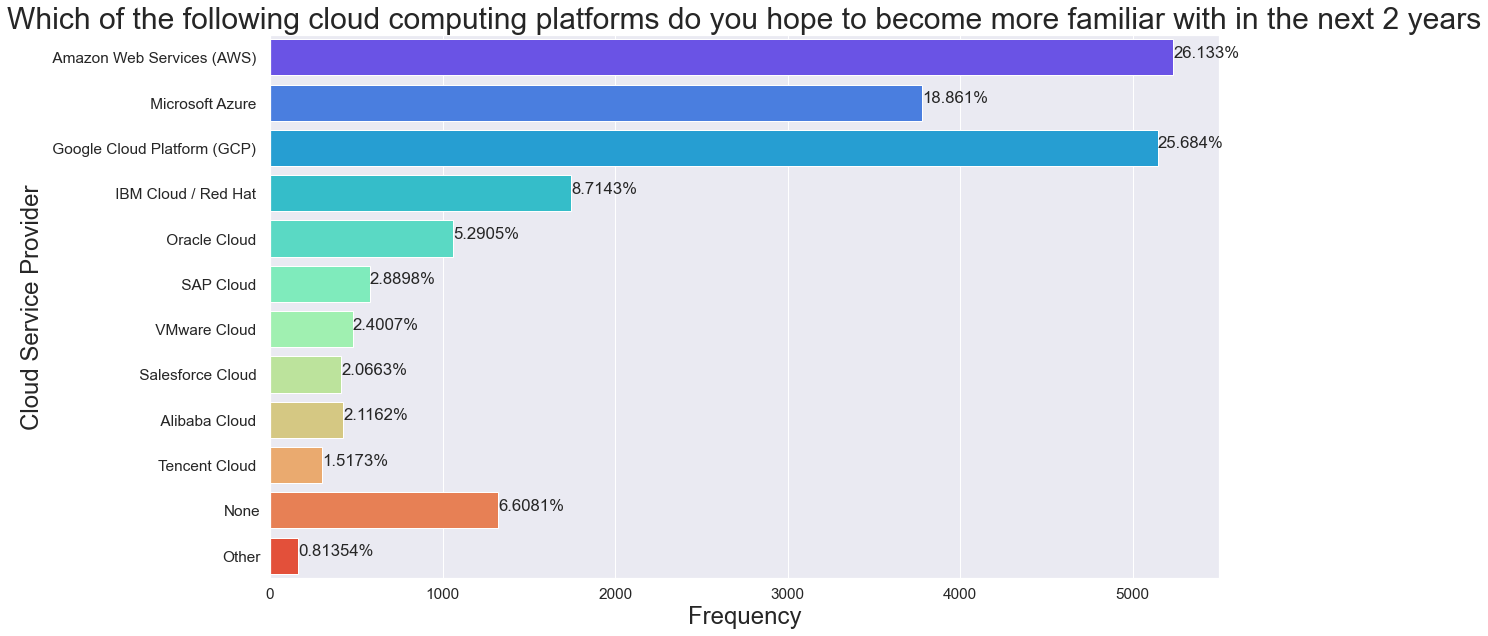

In [47]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_26_b.Q26, data = response, palette = "rainbow")

total = len(response['Q26_B_Part_1'])
for p in ax.patches:
        percentage = '{:.5}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Cloud Service Provider', fontsize = 24)

plt.show()

***Question 27-Part_A: Do you use any of the following cloud computing products on a regular basis?***

In [48]:
question_27 = np.concatenate([response.Q27_A_Part_1,
                              response.Q27_A_Part_2,
                              response.Q27_A_Part_3,
                              response.Q27_A_Part_4,
                              response.Q27_A_Part_5,
                              response.Q27_A_Part_6,
                              response.Q27_A_Part_7,
                              response.Q27_A_Part_8,
                              response.Q27_A_Part_9,
                              response.Q27_A_Part_10,
                              response.Q27_A_Part_11,
                              response.Q27_A_OTHER
])

ques_27 = pd.concat([response, pd.DataFrame(question_27)], ignore_index = True, axis = 1)

ques_27.columns = np.append(response.columns.values, 'Q27')

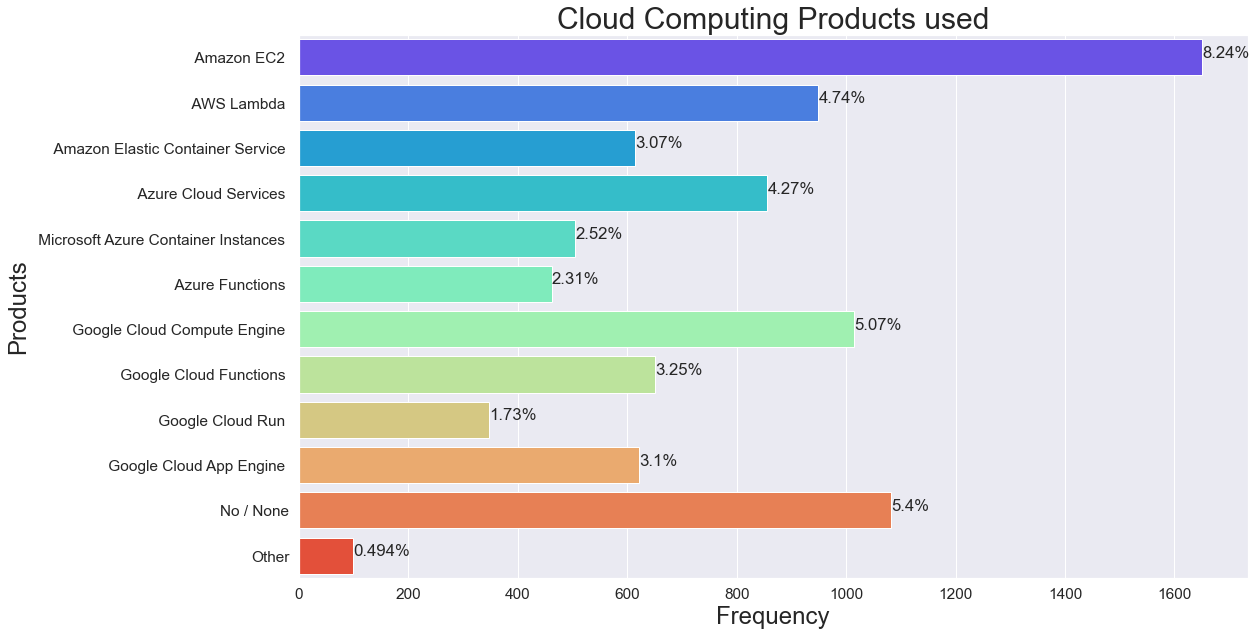

In [49]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_27.Q27, data = response, palette = "rainbow")

total = len(response['Q27_A_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Cloud Computing Products used',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Products', fontsize = 24)

plt.show()

***Question 27-Part_B: In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products?***

In [50]:
question_27_b = np.concatenate([response.Q27_B_Part_1,
                              response.Q27_B_Part_2,
                              response.Q27_B_Part_3,
                              response.Q27_B_Part_4,
                              response.Q27_B_Part_5,
                              response.Q27_B_Part_6,
                              response.Q27_B_Part_7,
                              response.Q27_B_Part_8,
                              response.Q27_B_Part_9,
                              response.Q27_B_Part_10,
                              response.Q27_B_Part_11,
                              response.Q27_B_OTHER
])

ques_27_b = pd.concat([response, pd.DataFrame(question_27_b)], ignore_index = True, axis = 1)

ques_27_b.columns = np.append(response.columns.values, 'Q27_b')

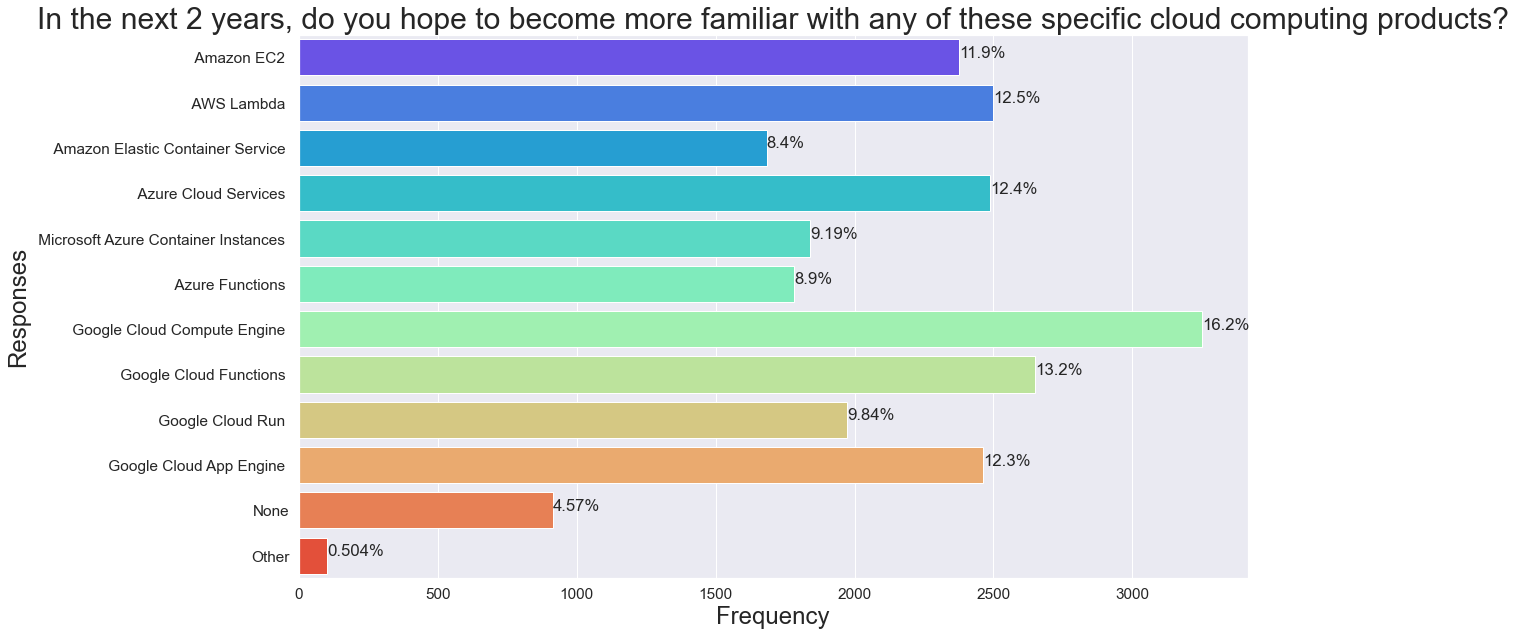

In [51]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_27_b.Q27_b, data = response, palette = "rainbow")

total = len(response['Q27_B_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Responses', fontsize = 24)

plt.show()

***Question 28_A: Do you use any of the following machine learning products on a regular basis?***

In [52]:
question_28 = np.concatenate([response.Q28_A_Part_1,
                              response.Q28_A_Part_2,
                              response.Q28_A_Part_3,
                              response.Q28_A_Part_4,
                              response.Q28_A_Part_5,
                              response.Q28_A_Part_6,
                              response.Q28_A_Part_7,
                              response.Q28_A_Part_8,
                              response.Q28_A_Part_9,
                              response.Q28_A_Part_10,
                              response.Q28_A_OTHER
])

ques_28 = pd.concat([response, pd.DataFrame(question_28)], ignore_index = True, axis = 1)

ques_28.columns = np.append(response.columns.values, 'Q28')

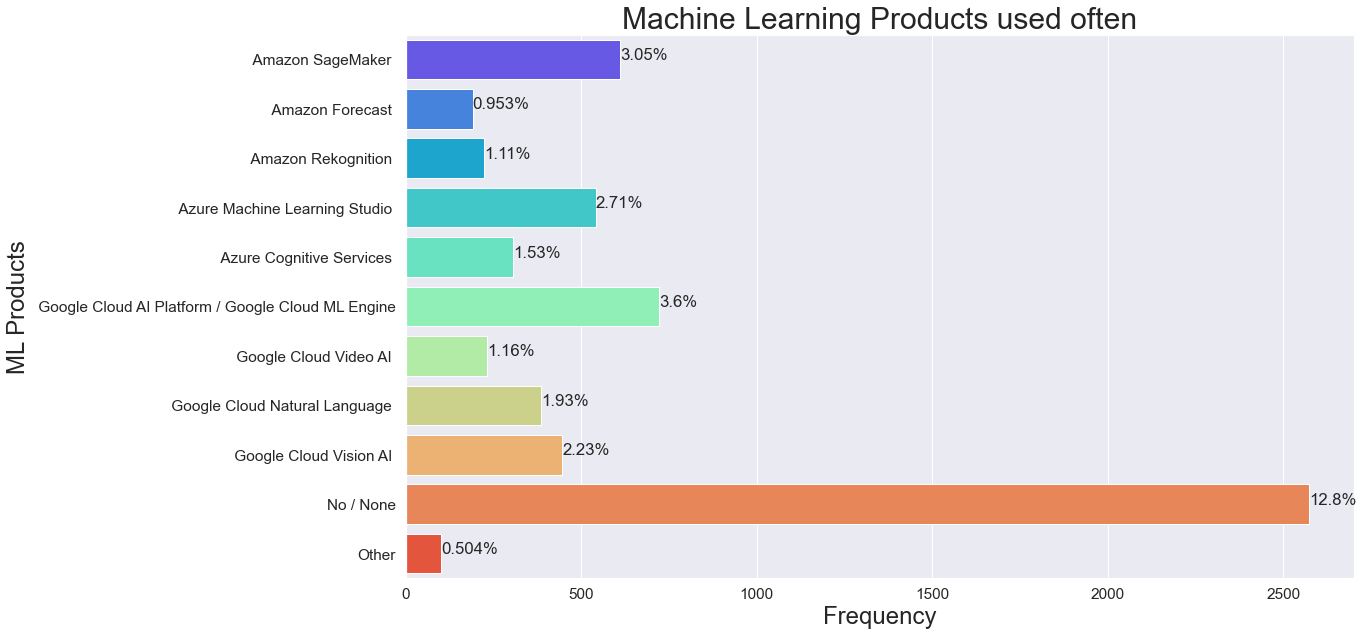

In [53]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_28.Q28, data = response, palette = "rainbow")

total = len(response['Q28_A_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Machine Learning Products used often',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('ML Products', fontsize = 24)

plt.show()

***Question 28_B: In the next 2 years, do you hope to become more familiar with any of these specific machine learning products?***

In [54]:
question_28_b = np.concatenate([response.Q28_B_Part_1,
                              response.Q28_B_Part_2,
                              response.Q28_B_Part_3,
                              response.Q28_B_Part_4,
                              response.Q28_B_Part_5,
                              response.Q28_B_Part_6,
                              response.Q28_B_Part_7,
                              response.Q28_B_Part_8,
                              response.Q28_B_Part_9,
                              response.Q28_B_Part_10,
                              response.Q28_B_OTHER
])

ques_28_b = pd.concat([response, pd.DataFrame(question_28_b)], ignore_index = True, axis = 1)

ques_28_b.columns = np.append(response.columns.values, 'Q28_b')

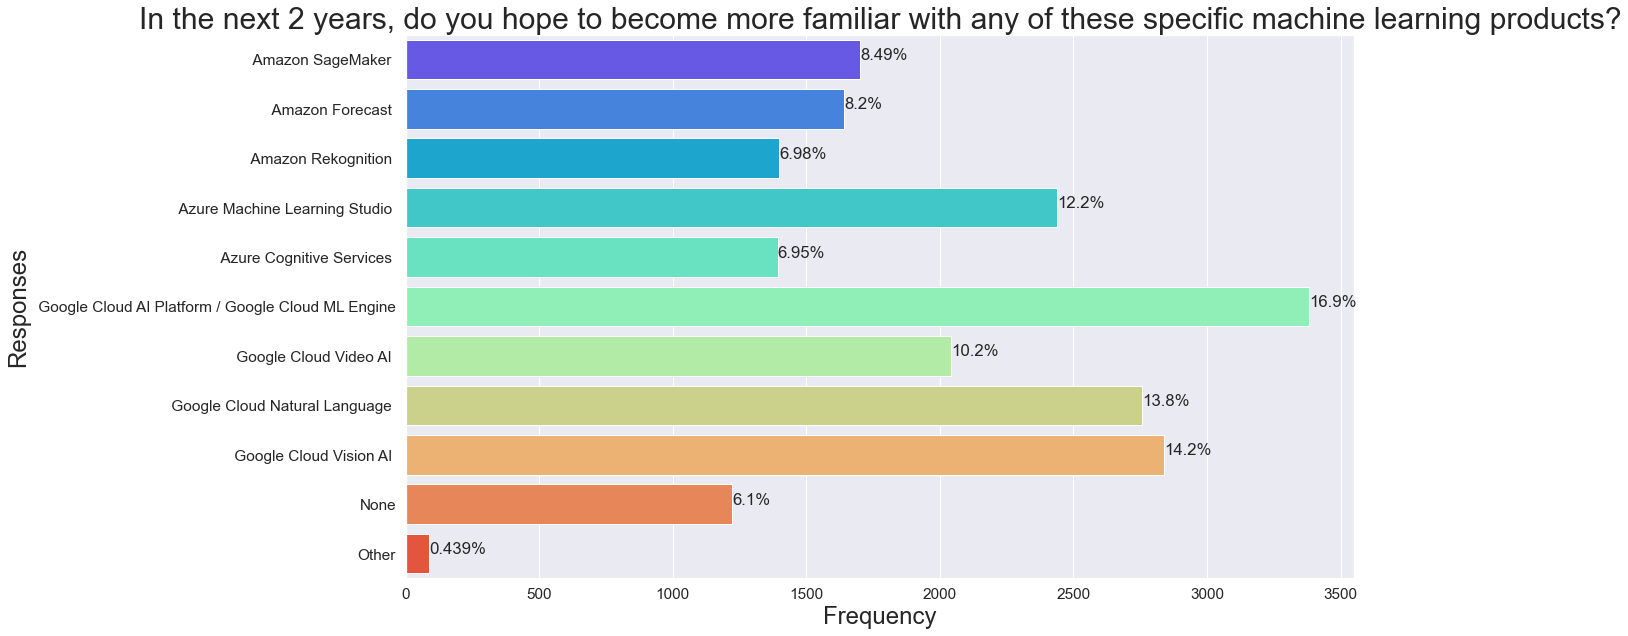

In [55]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_28_b.Q28_b, data = response, palette = "rainbow")

total = len(response['Q28_B_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('In the next 2 years, do you hope to become more familiar with any of these specific machine learning products?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Responses', fontsize = 24)

plt.show()

***Question 29_A: Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?***

In [56]:
question_29 = np.concatenate([response.Q29_A_Part_1,
                              response.Q29_A_Part_2,
                              response.Q29_A_Part_3,
                              response.Q29_A_Part_4,
                              response.Q29_A_Part_5,
                              response.Q29_A_Part_6,
                              response.Q29_A_Part_7,
                              response.Q29_A_Part_8,
                              response.Q29_A_Part_9,
                              response.Q29_A_Part_10,
                              response.Q29_A_Part_11,
                              response.Q29_A_Part_12,
                              response.Q29_A_Part_13,
                              response.Q29_A_Part_14,
                              response.Q29_A_Part_15,
                              response.Q29_A_Part_16,
                              response.Q29_A_Part_17,
                              response.Q29_A_OTHER
])

ques_29 = pd.concat([response, pd.DataFrame(question_29)], ignore_index = True, axis = 1)

ques_29.columns = np.append(response.columns.values, 'Q29')

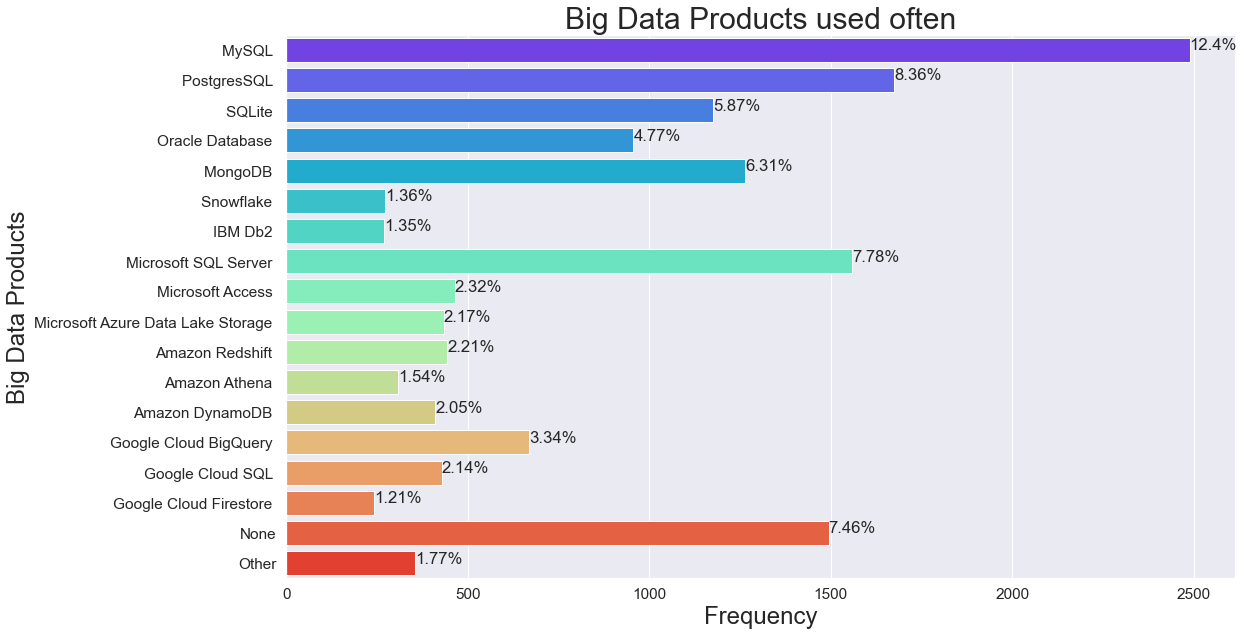

In [57]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_29.Q29, data = response, palette = "rainbow")

total = len(response['Q29_A_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Big Data Products used often',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Big Data Products', fontsize = 24)

plt.show()

***Question 29_B: Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years?***

In [58]:
question_29_B = np.concatenate([response.Q29_B_Part_1,
                              response.Q29_B_Part_2,
                              response.Q29_B_Part_3,
                              response.Q29_B_Part_4,
                              response.Q29_B_Part_5,
                              response.Q29_B_Part_6,
                              response.Q29_B_Part_7,
                              response.Q29_B_Part_8,
                              response.Q29_B_Part_9,
                              response.Q29_B_Part_10,
                              response.Q29_B_Part_11,
                              response.Q29_B_Part_12,
                              response.Q29_B_Part_13,
                              response.Q29_B_Part_14,
                              response.Q29_B_Part_15,
                              response.Q29_B_Part_16,
                              response.Q29_B_Part_17,
                              response.Q29_B_OTHER
])

ques_29_b = pd.concat([response, pd.DataFrame(question_29_B)], ignore_index = True, axis = 1)

ques_29_b.columns = np.append(response.columns.values, 'Q29_b')

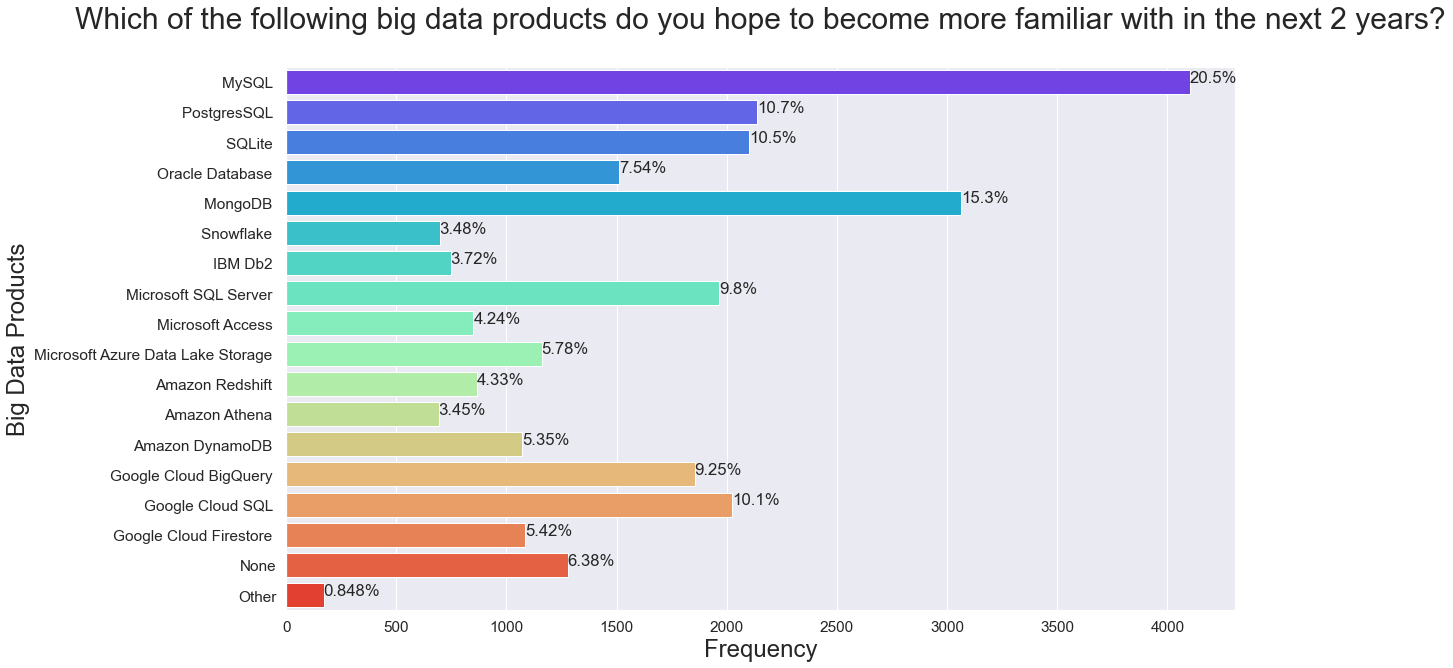

In [59]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_29_b.Q29_b, data = response, palette = "rainbow")

total = len(response['Q29_B_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Which of the following big data products do you hope to become more familiar with in the next 2 years?\n',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Big Data Products', fontsize = 24)

plt.show()

***Question 30: Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?***

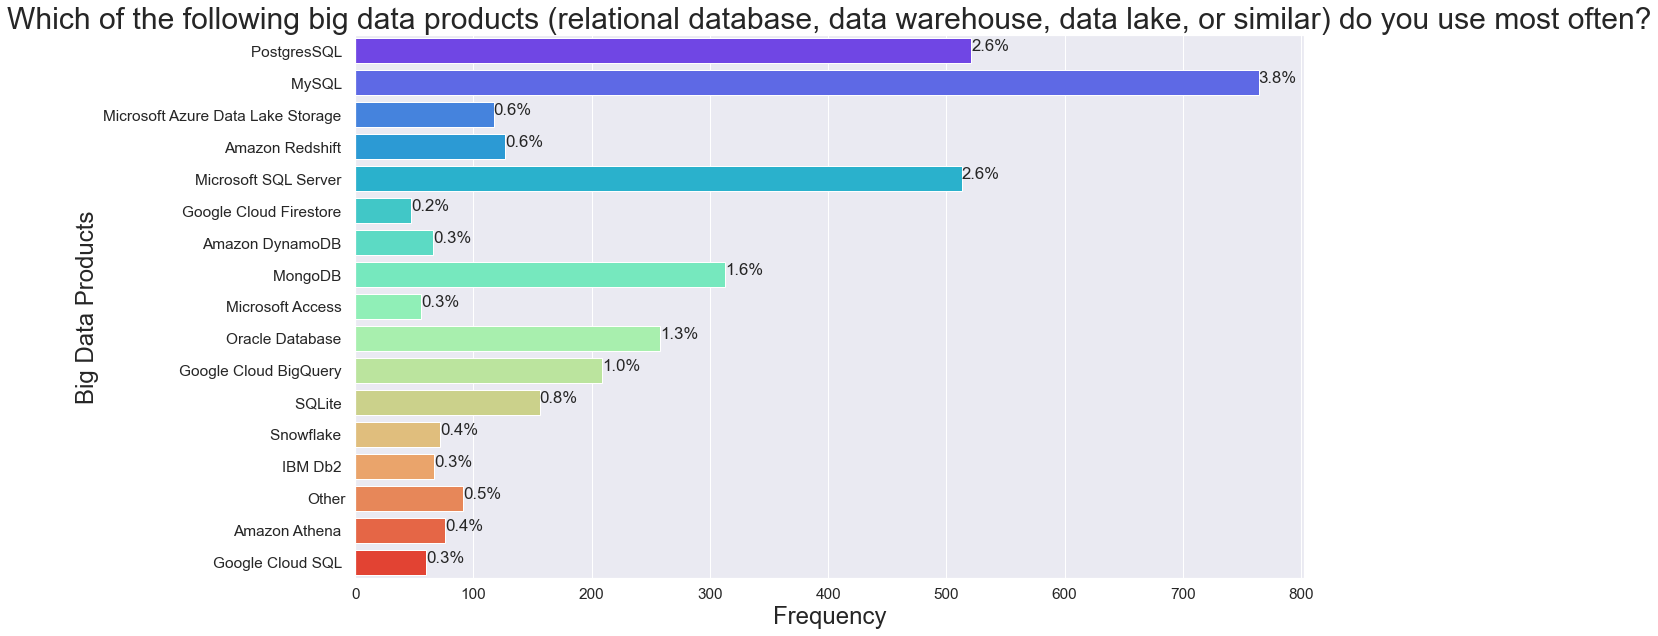

In [60]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q30', data = response, palette = "rainbow")

total = len(response['Q30'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Big Data Products', fontsize = 24)

plt.show()

***Question 31: Which of the following business intelligence tools do you use on a regular basis?***

In [61]:
question_31 = np.concatenate([response.Q31_A_Part_1,
                              response.Q31_A_Part_2,
                              response.Q31_A_Part_3,
                              response.Q31_A_Part_4,
                              response.Q31_A_Part_5,
                              response.Q31_A_Part_6,
                              response.Q31_A_Part_7,
                              response.Q31_A_Part_8,
                              response.Q31_A_Part_9,
                              response.Q31_A_Part_10,
                              response.Q31_A_Part_11,
                              response.Q31_A_Part_12,
                              response.Q31_A_Part_13,
                              response.Q31_A_Part_14,
                              response.Q31_A_OTHER
])

ques_31 = pd.concat([response, pd.DataFrame(question_31)], ignore_index = True, axis = 1)

ques_31.columns = np.append(response.columns.values, 'Q31')

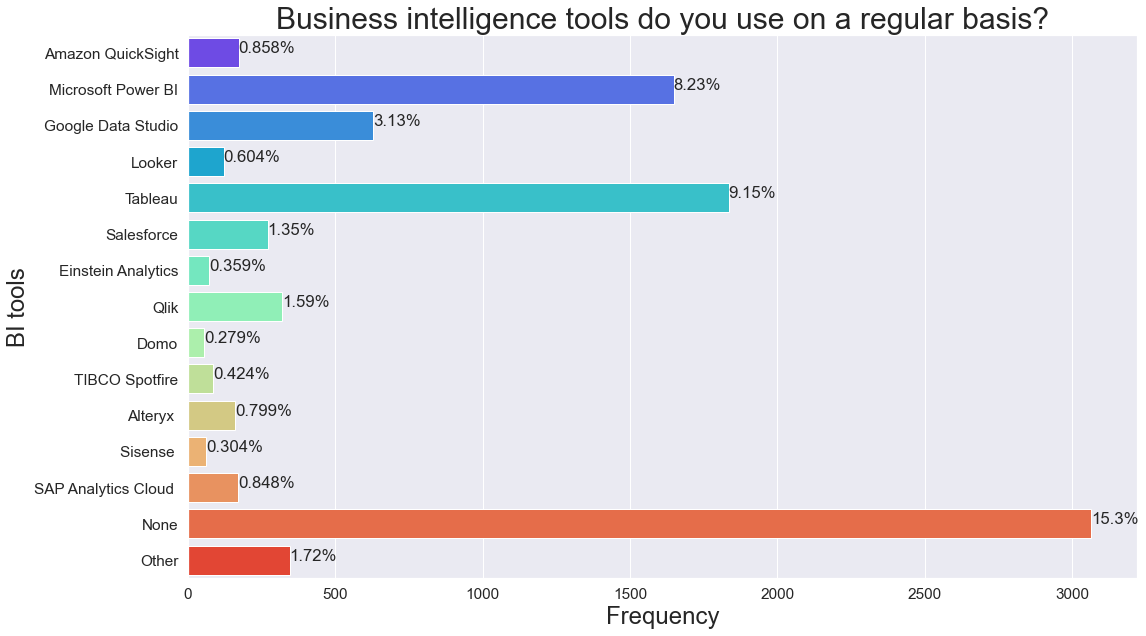

In [62]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_31.Q31, data = response, palette = "rainbow")

total = len(response['Q31_A_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Business intelligence tools do you use on a regular basis?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('BI tools', fontsize = 24)

plt.show()

***Question 31_b: Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years?***

In [63]:
question_31_b = np.concatenate([response.Q31_B_Part_1,
                              response.Q31_B_Part_2,
                              response.Q31_B_Part_3,
                              response.Q31_B_Part_4,
                              response.Q31_B_Part_5,
                              response.Q31_B_Part_6,
                              response.Q31_B_Part_7,
                              response.Q31_B_Part_8,
                              response.Q31_B_Part_9,
                              response.Q31_B_Part_10,
                              response.Q31_B_Part_11,
                              response.Q31_B_Part_12,
                              response.Q31_B_Part_13,
                              response.Q31_B_Part_14,
                              response.Q31_B_OTHER
])

ques_31_b = pd.concat([response, pd.DataFrame(question_31_b)], ignore_index = True, axis = 1)

ques_31_b.columns = np.append(response.columns.values, 'Q31')

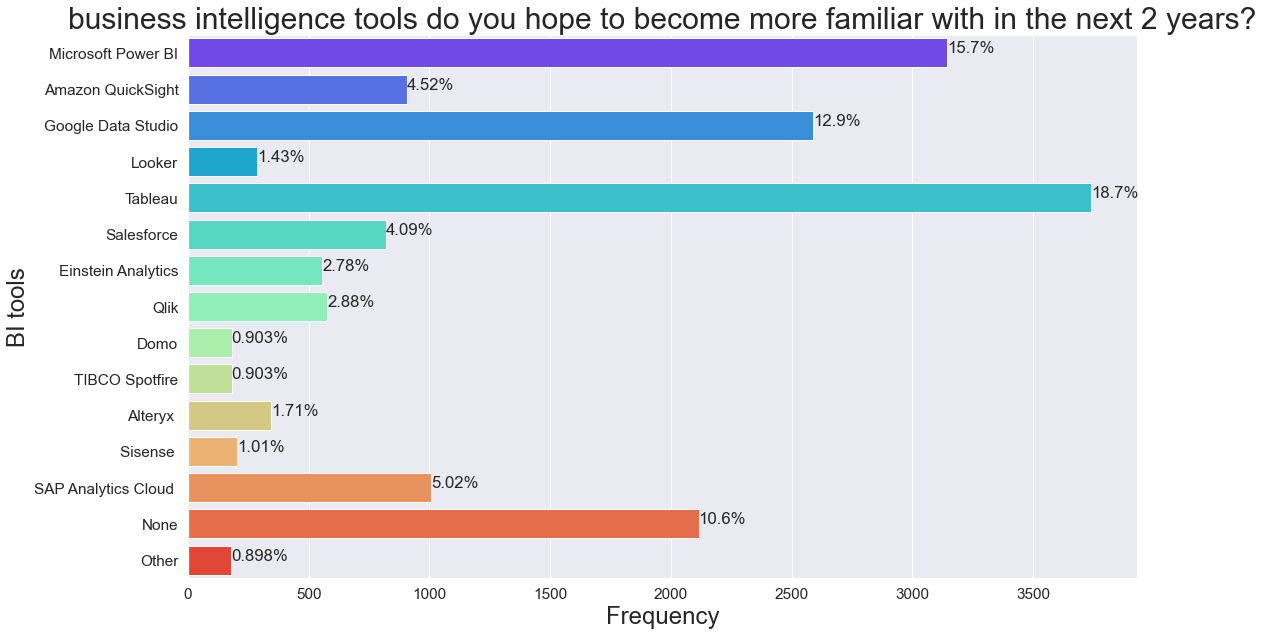

In [64]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_31_b.Q31, data = response, palette = "rainbow")

total = len(response['Q31_B_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('business intelligence tools do you hope to become more familiar with in the next 2 years?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('BI tools', fontsize = 24)

plt.show()

***Question 32: Which of the following business intelligence tools do you use most often?***

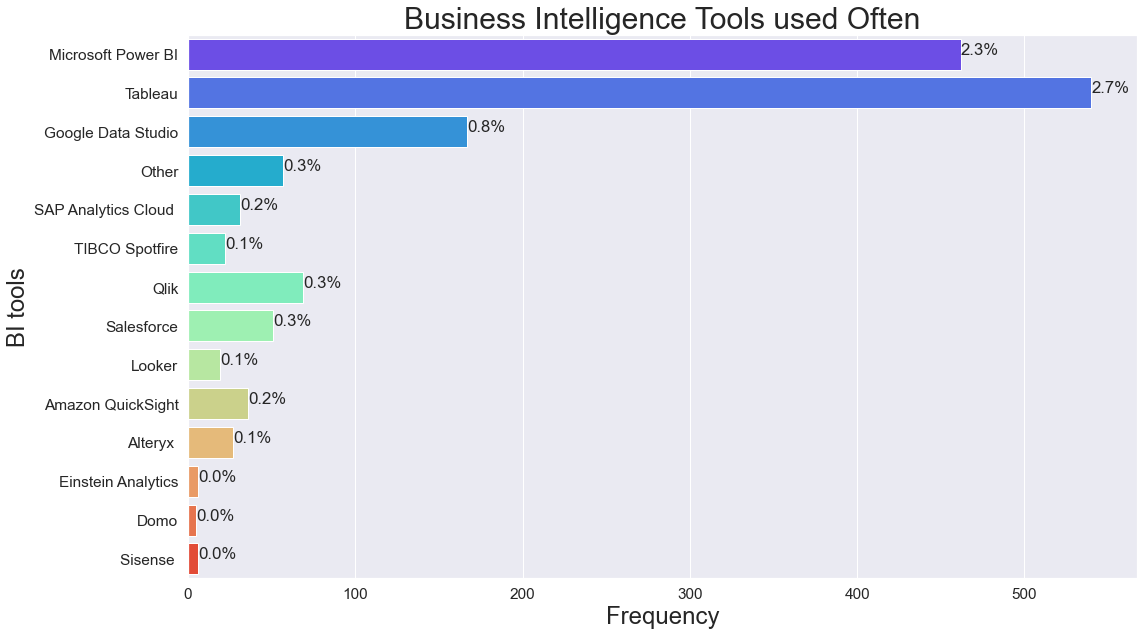

In [65]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q32', data = response, palette = "rainbow")

total = len(response['Q32'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Business Intelligence Tools used Often',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('BI tools', fontsize = 24)

plt.show()

***Question 33: Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?***

In [66]:
question_33 = np.concatenate([response.Q33_A_Part_1,
                              response.Q33_A_Part_2,
                              response.Q33_A_Part_3,
                              response.Q33_A_Part_4,
                              response.Q33_A_Part_5,
                              response.Q33_A_Part_6,
                              response.Q33_A_Part_7,
                              response.Q33_A_OTHER
])

ques_33 = pd.concat([response, pd.DataFrame(question_33)], ignore_index = True, axis = 1)

ques_33.columns = np.append(response.columns.values, 'Q33')

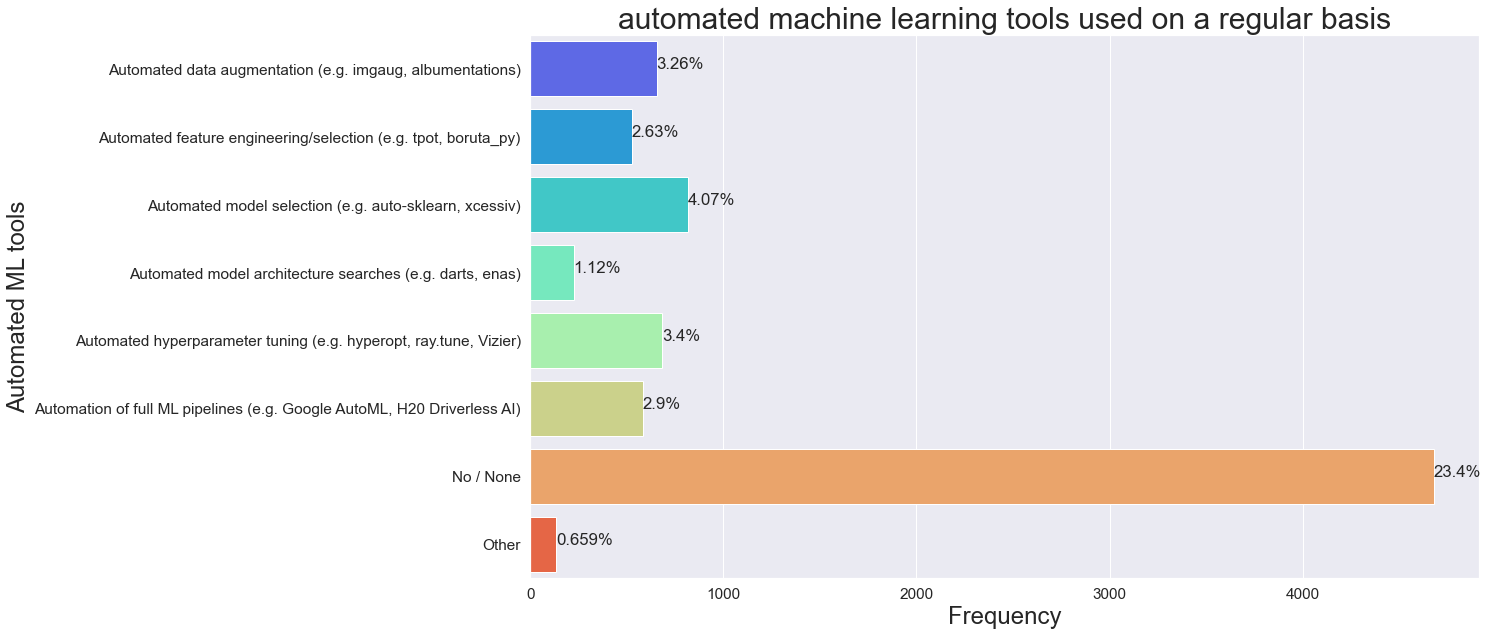

In [67]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_33.Q33, data = response, palette = "rainbow")

total = len(response['Q33_A_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('automated machine learning tools used on a regular basis',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Automated ML tools', fontsize = 24)

plt.show()

***Question 33_b: Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?***

In [68]:
question_33_b = np.concatenate([response.Q33_B_Part_1,
                              response.Q33_B_Part_2,
                              response.Q33_B_Part_3,
                              response.Q33_B_Part_4,
                              response.Q33_B_Part_5,
                              response.Q33_B_Part_6,
                              response.Q33_B_Part_7,
                              response.Q33_B_OTHER
])

ques_33_b = pd.concat([response, pd.DataFrame(question_33_b)], ignore_index = True, axis = 1)

ques_33_b.columns = np.append(response.columns.values, 'Q33')

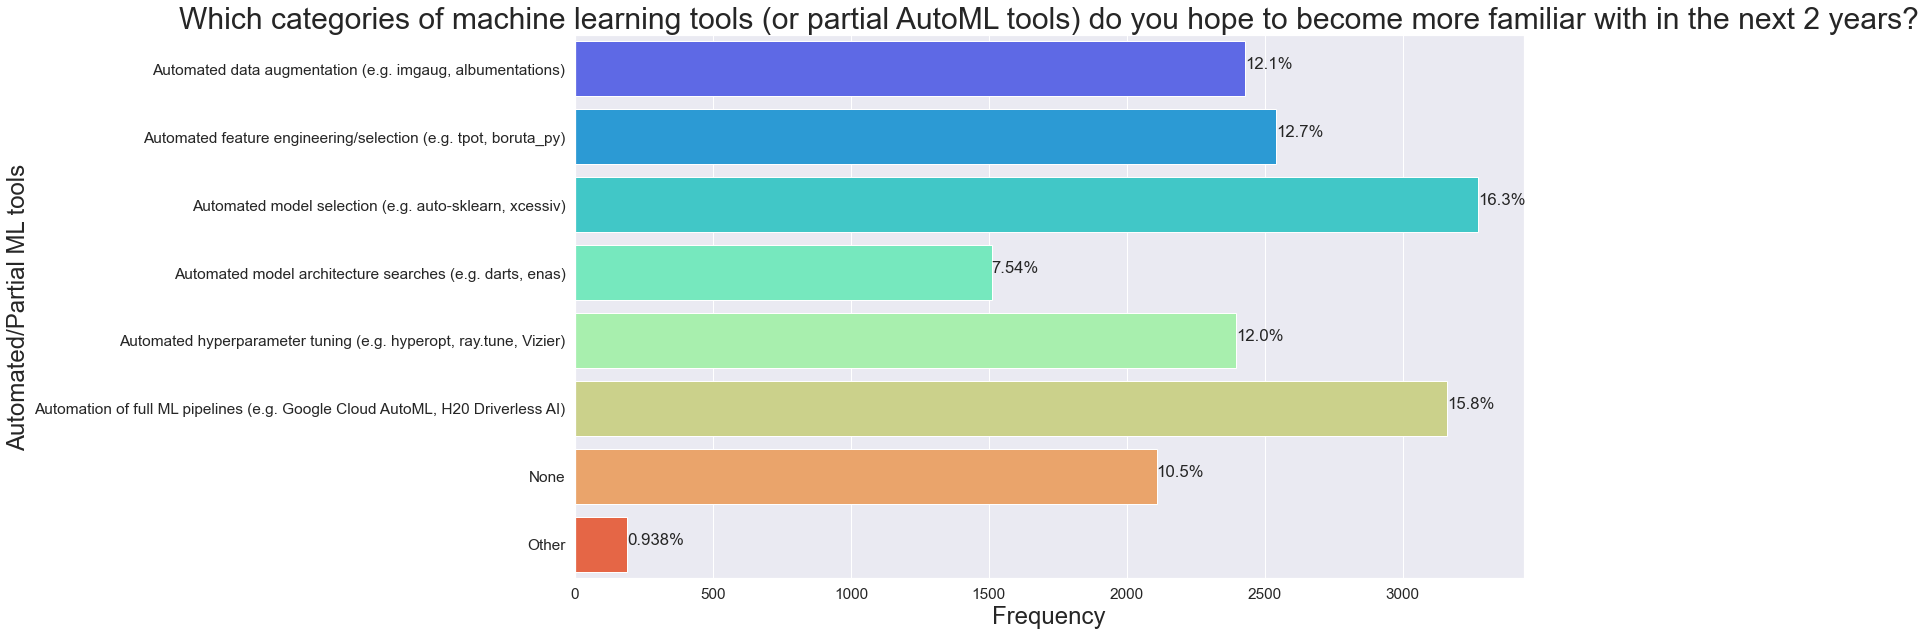

In [69]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_33_b.Q33, data = response, palette = "rainbow")

total = len(response['Q33_B_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Which categories of machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Automated/Partial ML tools', fontsize = 24)

plt.show()

***Question 34: Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?***

In [70]:
question_34 = np.concatenate([response.Q34_A_Part_1,
                              response.Q34_A_Part_2,
                              response.Q34_A_Part_3,
                              response.Q34_A_Part_4,
                              response.Q34_A_Part_5,
                              response.Q34_A_Part_6,
                              response.Q34_A_Part_7,
                              response.Q34_A_Part_8,
                              response.Q34_A_Part_9,
                              response.Q34_A_Part_10,
                              response.Q34_A_Part_11,
                              response.Q34_A_OTHER
])

ques_34 = pd.concat([response, pd.DataFrame(question_34)], ignore_index = True, axis = 1)

ques_34.columns = np.append(response.columns.values, 'Q34')

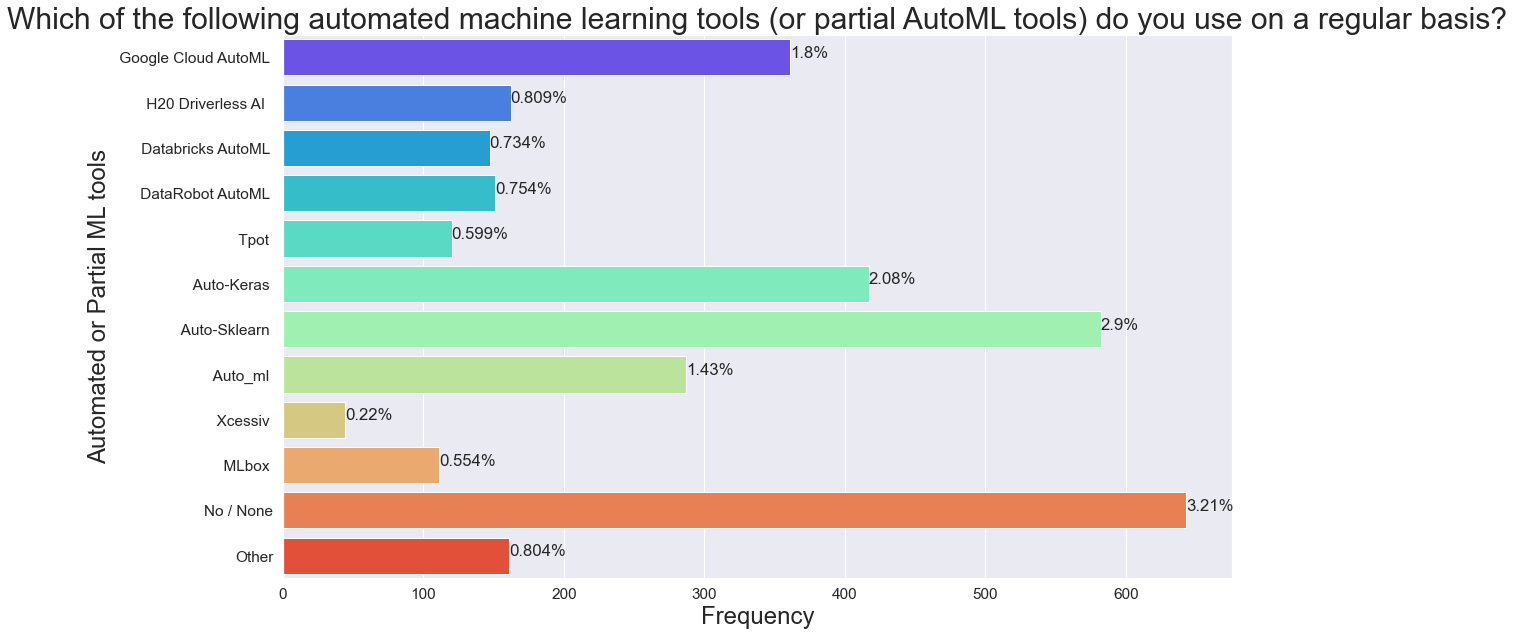

In [71]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_34.Q34, data = response, palette = "rainbow")

total = len(response['Q34_A_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Automated or Partial ML tools', fontsize = 24)

plt.show()

***Question 34_B: Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?***

In [72]:
question_34_b = np.concatenate([response.Q34_B_Part_1,
                              response.Q34_B_Part_2,
                              response.Q34_B_Part_3,
                              response.Q34_B_Part_4,
                              response.Q34_B_Part_5,
                              response.Q34_B_Part_6,
                              response.Q34_B_Part_7,
                              response.Q34_B_Part_8,
                              response.Q34_B_Part_9,
                              response.Q34_B_Part_10,
                              response.Q34_B_Part_11,
                              response.Q34_B_OTHER
])

ques_34_b = pd.concat([response, pd.DataFrame(question_34_b)], ignore_index = True, axis = 1)

ques_34_b.columns = np.append(response.columns.values, 'Q34_b')

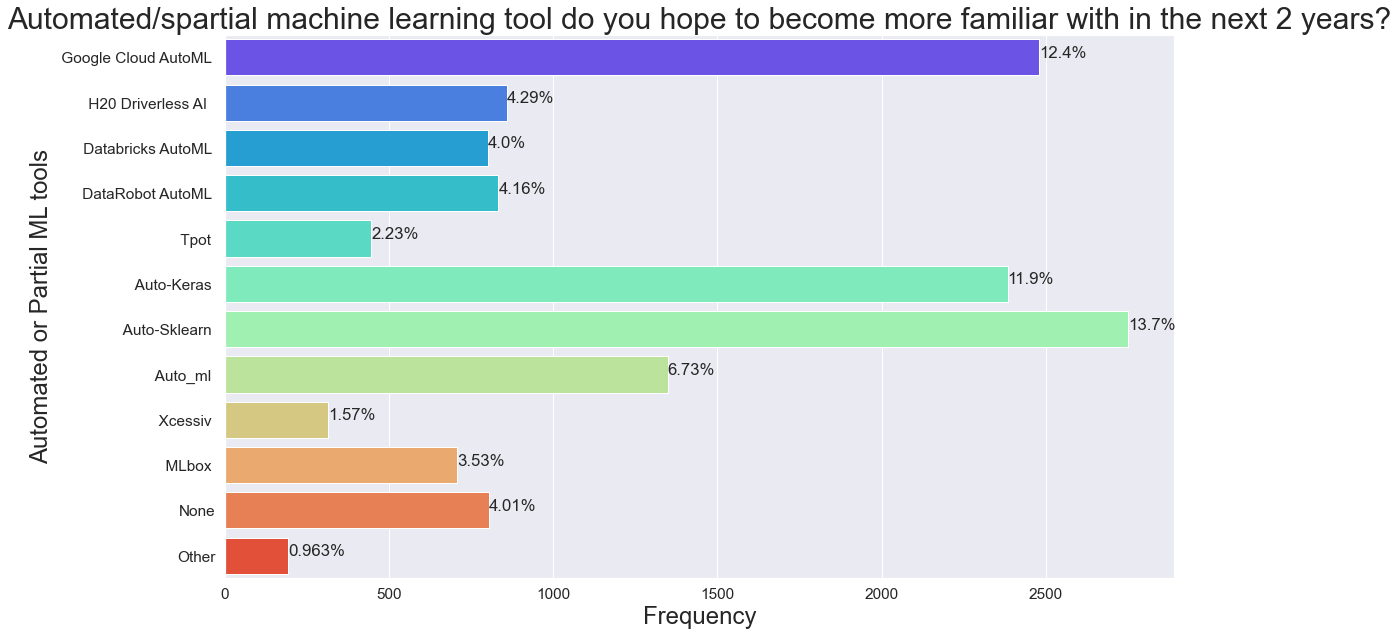

In [73]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_34_b.Q34_b, data = response, palette = "rainbow")

total = len(response['Q34_B_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Automated/spartial machine learning tool do you hope to become more familiar with in the next 2 years?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Automated or Partial ML tools', fontsize = 24)

plt.show()

***Question 35: Do you use any tools to help manage machine learning experiments?***

In [74]:
question_35 = np.concatenate([response.Q35_A_Part_1,
                              response.Q35_A_Part_2,
                              response.Q35_A_Part_3,
                              response.Q35_A_Part_4,
                              response.Q35_A_Part_5,
                              response.Q35_A_Part_6,
                              response.Q35_A_Part_7,
                              response.Q35_A_Part_8,
                              response.Q35_A_Part_9,
                              response.Q35_A_Part_10,
                              response.Q35_A_OTHER
])

ques_35 = pd.concat([response, pd.DataFrame(question_35)], ignore_index = True, axis = 1)

ques_35.columns = np.append(response.columns.values, 'Q35')

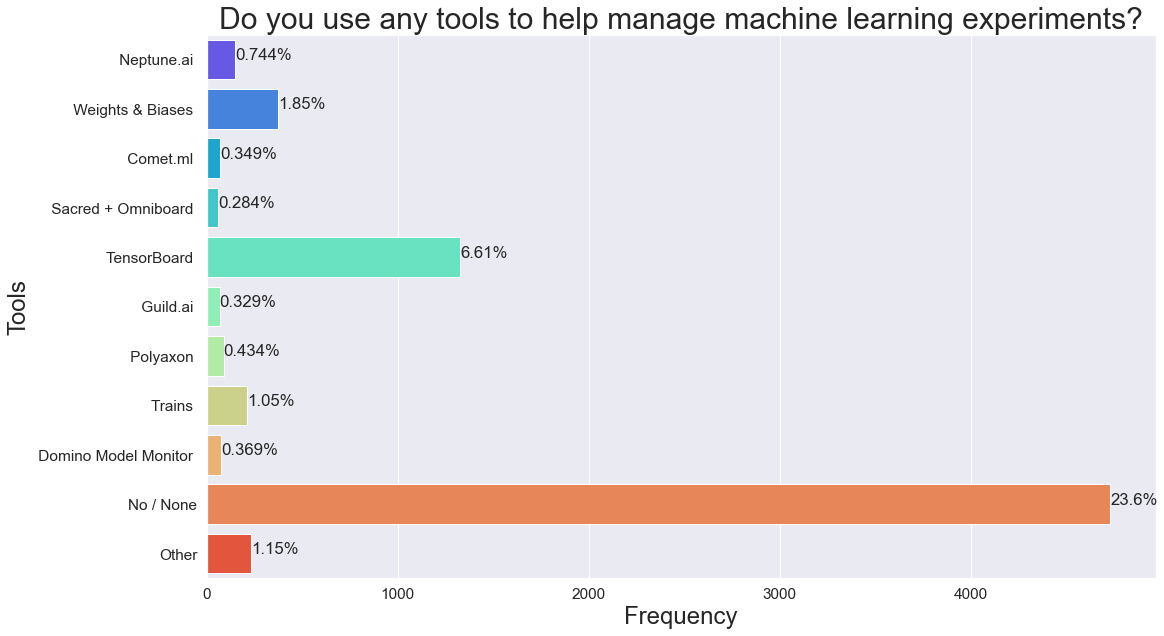

In [75]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_35.Q35, data = response, palette = "rainbow")

total = len(response['Q35_A_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Do you use any tools to help manage machine learning experiments?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Tools', fontsize = 24)

plt.show()

***Question 35_b: In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?***

In [76]:
question_35_b = np.concatenate([response.Q35_B_Part_1,
                              response.Q35_B_Part_2,
                              response.Q35_B_Part_3,
                              response.Q35_B_Part_4,
                              response.Q35_B_Part_5,
                              response.Q35_B_Part_6,
                              response.Q35_B_Part_7,
                              response.Q35_B_Part_8,
                              response.Q35_B_Part_9,
                              response.Q35_B_Part_10,
                              response.Q35_B_OTHER
])

ques_35_b = pd.concat([response, pd.DataFrame(question_35_b)], ignore_index = True, axis = 1)

ques_35_b.columns = np.append(response.columns.values, 'Q35')

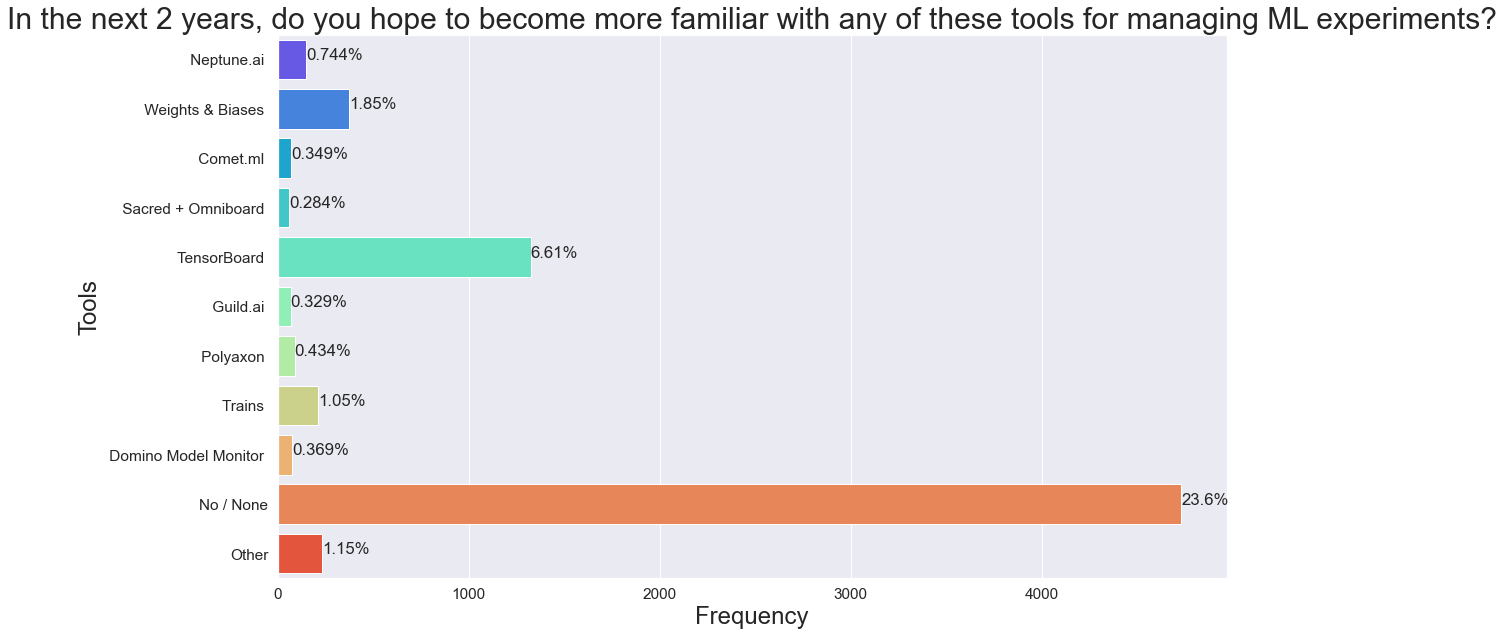

In [77]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_35.Q35, data = response, palette = "rainbow")

total = len(response['Q35_A_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Tools', fontsize = 24)

plt.show()

***Question 36: Where do you publicly share or deploy your data analysis or machine learning applications?***

In [78]:
question_36 = np.concatenate([response.Q36_Part_1,
                              response.Q36_Part_2,
                              response.Q36_Part_3,
                              response.Q36_Part_4,
                              response.Q36_Part_5,
                              response.Q36_Part_6,
                              response.Q36_Part_7,
                              response.Q36_Part_8,
                              response.Q36_Part_9,
                              response.Q36_OTHER
])

ques_36 = pd.concat([response, pd.DataFrame(question_36)], ignore_index = True, axis = 1)

ques_36.columns = np.append(response.columns.values, 'Q36')

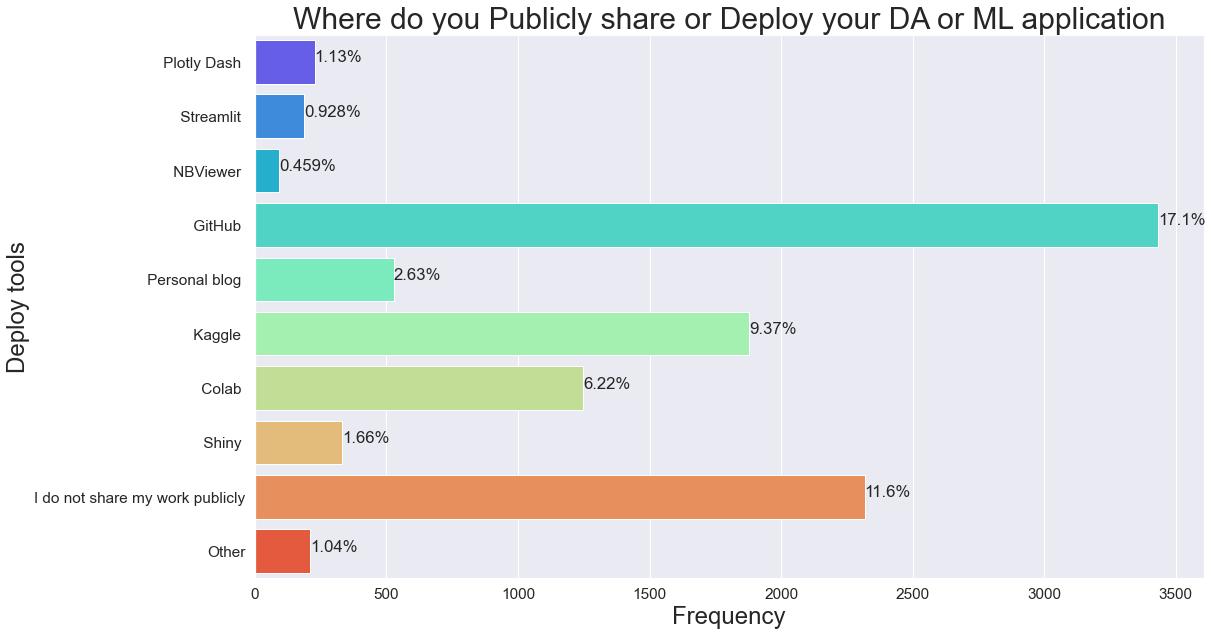

In [79]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_36.Q36, data = response, palette = "rainbow")

total = len(response['Q36_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Where do you Publicly share or Deploy your DA or ML application',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Deploy tools', fontsize = 24)

plt.show()

***Question 37: On which platforms have you begun or completed data science courses?***

In [80]:
question_37 = np.concatenate([response.Q37_Part_1,
                              response.Q37_Part_2,
                              response.Q37_Part_3,
                              response.Q37_Part_4,
                              response.Q37_Part_5,
                              response.Q37_Part_6,
                              response.Q37_Part_7,
                              response.Q37_Part_8,
                              response.Q37_Part_9,
                              response.Q37_Part_10,
                              response.Q37_Part_11,
                              response.Q37_OTHER
])

ques_37 = pd.concat([response, pd.DataFrame(question_37)], ignore_index = True, axis = 1)

ques_37.columns = np.append(response.columns.values, 'Q37')

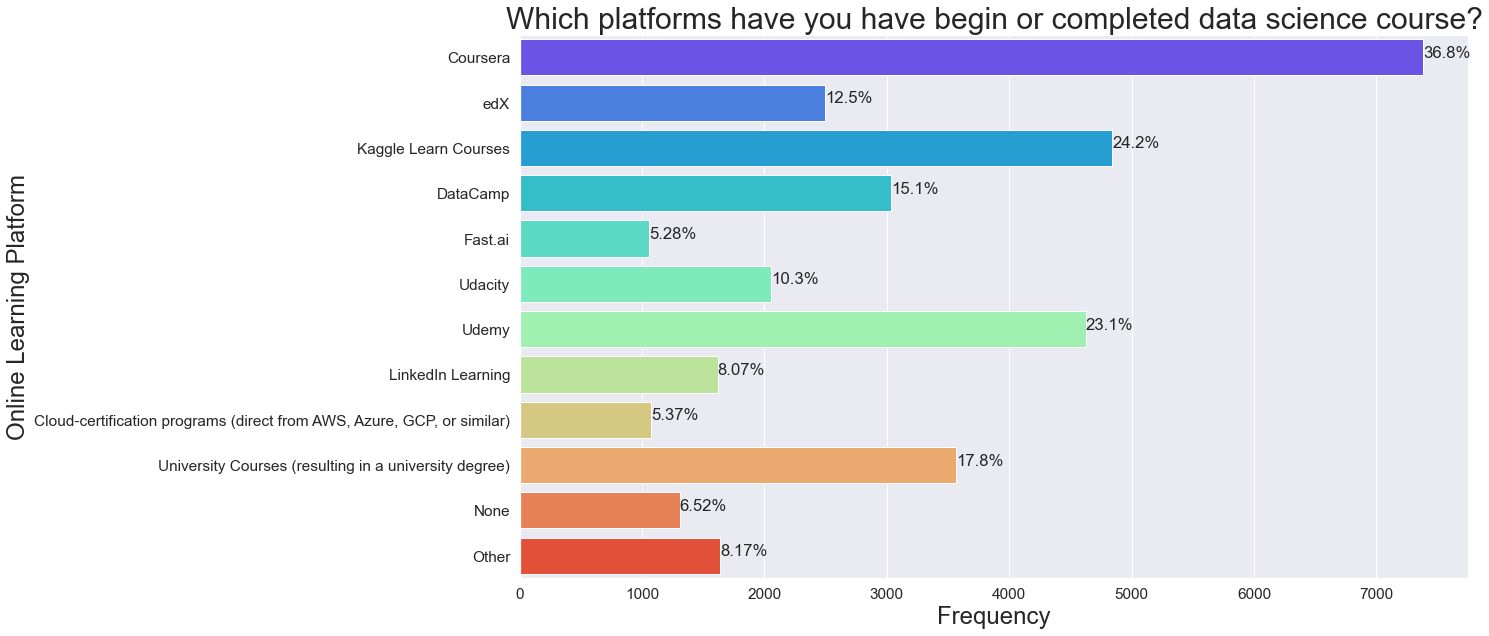

In [81]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_37.Q37, data = response, palette = "rainbow")

total = len(response['Q37_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Which platforms have you have begin or completed data science course?',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Online Learning Platform', fontsize = 24)

plt.show()

***Question 38: What is the primary tool that you use at work or school to analyze data?***

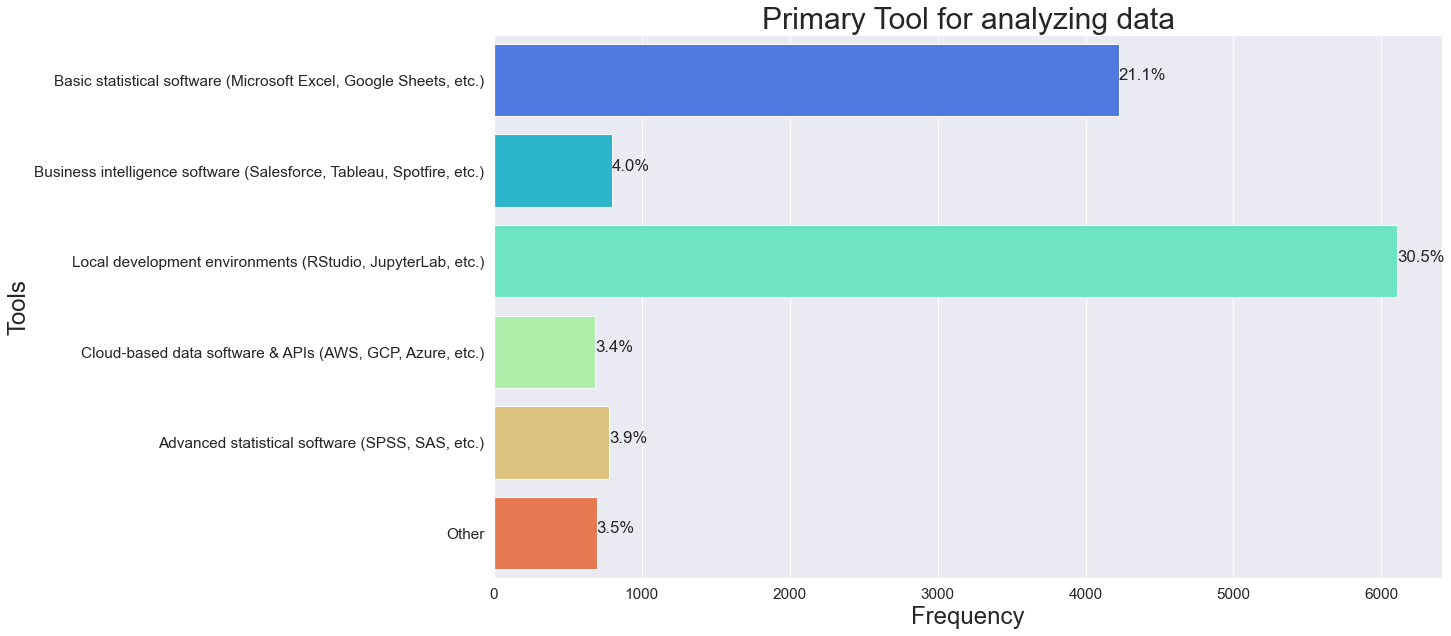

In [82]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q38', data = response, palette = "rainbow")

total = len(response['Q38'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Primary Tool for analyzing data',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Tools', fontsize = 24)

plt.show()

***Question 39: Who/what are your favorite media sources that report on data science topics?***

In [83]:
question_39 = np.concatenate([response.Q39_Part_1,
                              response.Q39_Part_2,
                              response.Q39_Part_3,
                              response.Q39_Part_4,
                              response.Q39_Part_5,
                              response.Q39_Part_6,
                              response.Q39_Part_7,
                              response.Q39_Part_8,
                              response.Q39_Part_9,
                              response.Q39_Part_10,
                              response.Q39_Part_11,
                              response.Q39_OTHER
])

ques_39 = pd.concat([response, pd.DataFrame(question_39)], ignore_index = True, axis = 1)

ques_39.columns = np.append(response.columns.values, 'Q39')

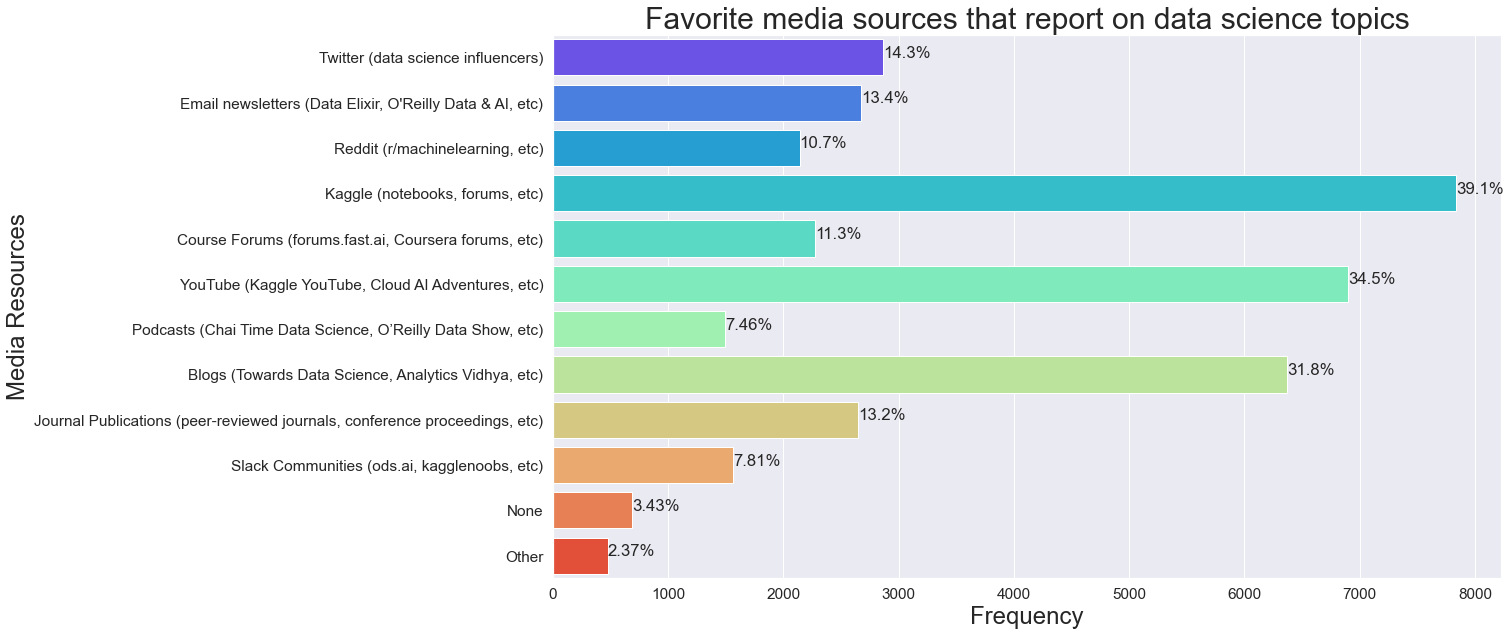

In [84]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = ques_39.Q39, data = response, palette = "rainbow")

total = len(response['Q39_Part_1'])
for p in ax.patches:
        percentage = '{:.3}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Favorite media sources that report on data science topics',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Media Resources', fontsize = 24)

plt.show()